# Potenial Passing Output by Baker Mayfield in the 2023/2024 Season

In the following project, I'm trying to predict the season/game-by-game performance of Baker Mayfield, who will be the starting Quarterback of the Tampa Bay Buccaneers. Since the last offseason, the debate has begun that Baker is not good enough to be a starter. Last season was a little turbulent, but Baker signed with the Buccaneers. By predicting the game-by-game performance of Baker Mayfield, I want to get an idea of what state/shape Baker's career is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\gandj\OneDrive\Desktop\Case_Study\NFL\Baker_DataFrame.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['Cmp%']=round(df['Cmp']/df['Att']*100,2)
df['Avg_Yds']=round(df['Yds']/df['Cmp'],2)
df['Def-Rating']=round(abs((df['Int'] + df['Sk']))/df['Att'],2)*100
df=df[['Player','Tm','Cmp','Att','Cmp%','Avg_Yds','Yds','TD','Int','Sk','Def-Rating','Lng','Rate','Home Game','Opponent','Year','# TopReceiver','# TopRunningBacks']]
df.head()

,Player,Tm,Cmp,Att,Cmp%,Avg_Yds,Yds,TD,Int,Sk,Def-Rating,Lng,Rate,Home Game,Opponent,Year,# TopReceiver,# TopRunningBacks
0,Baker Mayfield,CLE,17,23,73.91,11.82,201,0,0,1,4.0,29.0,100.1,1,NYJ,2018,1,0.0
1,Baker Mayfield,CLE,21,41,51.22,14.05,295,2,2,2,10.0,59.0,70.7,0,OAK,2018,0,1.0
2,Baker Mayfield,CLE,25,43,58.14,13.68,342,1,1,5,14.0,39.0,81.7,1,BAL,2018,3,0.0
3,Baker Mayfield,CLE,22,46,47.83,10.82,238,1,2,5,15.0,32.0,52.6,1,LAC,2018,1,0.0
4,Baker Mayfield,CLE,23,34,67.65,9.35,215,2,0,5,15.0,23.0,104.4,0,TAM,2018,1,0.0


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             71 non-null     object 
 1   Tm                 71 non-null     object 
 2   Cmp                71 non-null     int64  
 3   Att                71 non-null     int64  
 4   Cmp%               71 non-null     float64
 5   Avg_Yds            71 non-null     float64
 6   Yds                71 non-null     int64  
 7   TD                 71 non-null     int64  
 8   Int                71 non-null     int64  
 9   Sk                 71 non-null     int64  
 10  Def-Rating         71 non-null     float64
 11  Lng                71 non-null     float64
 12  Rate               71 non-null     float64
 13  Home Game          71 non-null     int64  
 14  Opponent           71 non-null     object 
 15  Year               71 non-null     int64  
 16  # TopReceiver      71 non-nu

In [4]:
df.isnull().sum()

Player               0
Tm                   0
Cmp                  0
Att                  0
Cmp%                 0
Avg_Yds              0
Yds                  0
TD                   0
Int                  0
Sk                   0
Def-Rating           0
Lng                  0
Rate                 0
Home Game            0
Opponent             0
Year                 0
# TopReceiver        0
# TopRunningBacks    0
dtype: int64

In the previous workbook we gathered the data from a website, we made sure not to have any missing data. The two line of code, were just for illustration purposes.

# Exploratory Analysis

Total Passing Yards of each played Season            Yds
Year Tm       
2018 CLE  3725
2019 CLE  3827
2020 CLE  4030
2021 CLE  3010
2022 CAR   962
     LAR   620


Games for each Team             Yds
Year Tm      
2018 CLE   14
2019 CLE   16
2020 CLE   18
2021 CLE   14
2022 CAR    5
     LAR    4


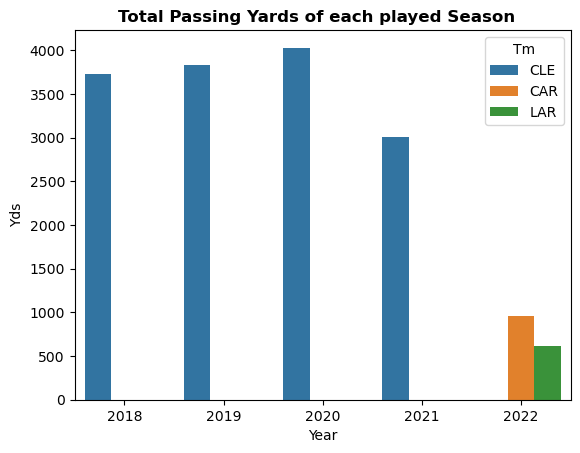

In [5]:
plt.figure()
plt.title('Total Passing Yards of each played Season  ', size=12, fontweight='bold')
sns.barplot(x='Year', y='Yds', data=df.groupby(['Tm','Year'])['Yds'].sum().to_frame().reset_index(), estimator='sum',
            hue='Tm')
print("Total Passing Yards of each played Season",df.groupby(['Year', 'Tm'])['Yds'].sum().to_frame())
print("\n")
print("Games for each Team  ",df.groupby(['Year', 'Tm'])['Yds'].count().to_frame())

Comparing Bakers performance aganist his average passing performance 
 Year  Tm 
2018  CLE    9
2019  CLE    9
2020  CLE    8
2021  CLE    5
2022  CAR    1
      LAR    1
Name: Yds, dtype: int64


Comparing Bakers performance aganist his median passing performance 
 Year  Tm 
2018  CLE    9
2019  CLE    9
2020  CLE    9
2021  CLE    7
2022  CAR    1
      LAR    1
Name: Yds, dtype: int64


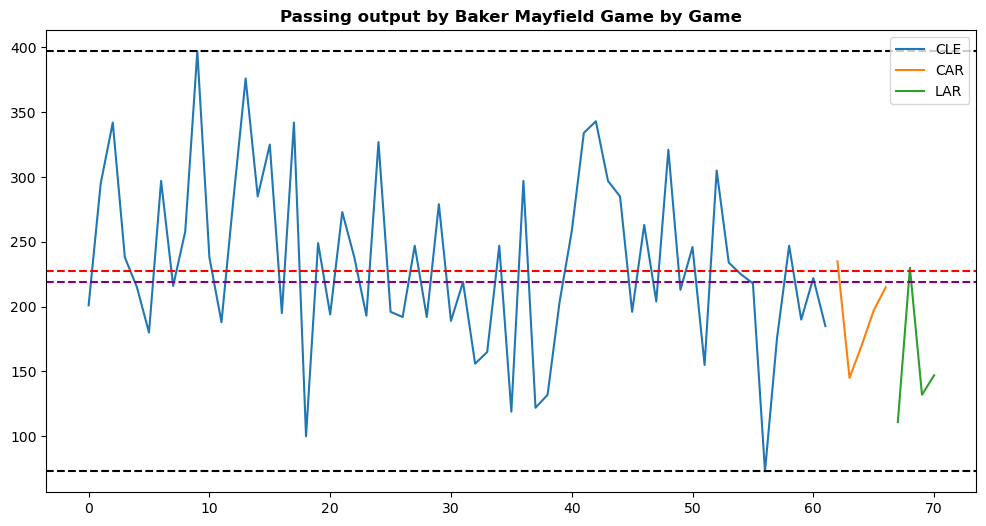

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df[df['Tm']=='CLE']['Yds'])
plt.plot(df[df['Tm']=='CAR']['Yds'])
plt.plot(df[df['Tm']=='LAR']['Yds'])
plt.legend(df['Tm'].unique())
plt.title('Passing output by Baker Mayfield Game by Game', size=12, fontweight='bold')
plt.axhline(df['Yds'].max(),linestyle='--', color='black')
plt.axhline(df['Yds'].min(),linestyle='--', color='black')
plt.axhline(df['Yds'].mean(),linestyle='--', color='red')
plt.axhline(df['Yds'].median(),linestyle='--', color='purple')

print("Comparing Bakers performance aganist his average passing performance",'\n',
      df[df['Yds']>=df['Yds'].mean()].groupby(['Year', 'Tm'])['Yds'].count())
print('\n')
print("Comparing Bakers performance aganist his median passing performance",'\n',
      df[df['Yds']>=df['Yds'].median()].groupby(['Year', 'Tm'])['Yds'].count())

In 2020 did Baker generate the most passing yards, but we need to keep in mind, that the Cleveland Browns made the playoffs in 2020. I included the passing yards of these two games. Based on that information, we can say that Baker's first three seasons were his most successfull once.

Since 2021, Baker's performance struggeld, especially in 2022. In the 2022 offseason, Baker was tradded to the North Carolina Panthers, where we played 5 games until he got benched and eventually released, then he signed with the Los Angeles Rams for the last 4 games of the season where he replaced the injured Matthew Stafford.

Comparing Bakers career stats against his mean and median of his passing performance, here we can observe the same trend, his stint with the Panthers and Rams was simply underperforming when copare against this career average.

Due to the fact that Baker was not able to play the majority of the season for one team it is quite unfair to compare total yards in a season. Next, we will use metrics as attempts, completions, longest completed pass, QB-rating etc. and get the max,min and mean.

In [7]:
df.groupby(['Year','Tm'])[['Cmp','Att','Cmp%','Avg_Yds','Yds','TD','Int','Sk','Def-Rating','Lng',
                           'Rate','# TopReceiver','# TopRunningBacks']].agg({max,min,np.mean}).transpose()

C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\3132643291.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  'Rate','# TopReceiver','# TopRunningBacks']].agg({max,min,np.mean}).transpose()
C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\3132643291.py:2: FutureWarning: The provided callable <function mean at 0x00000259EDEC9260> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  'Rate','# TopReceiver','# TopRunningBacks']].agg({max,min,np.mean}).transpose()
C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\3132643291.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will 

Year                          2018        2019        2020        2021  \
Tm                             CLE         CLE         CLE         CLE   
Cmp               max    29.000000   30.000000   28.000000   23.000000   
                  mean   22.142857   19.812500   19.388889   18.071429   
                  min    17.000000    8.000000   10.000000   11.000000   
Att               max    46.000000   43.000000   53.000000   38.000000   
                  mean   34.714286   33.375000   30.944444   29.857143   
                  min    20.000000   22.000000   18.000000   21.000000   
Cmp%              max    85.000000   70.590000   84.380000   90.480000   
                  mean   65.860000   58.150625   63.038889   61.792143   
                  min    47.830000   36.360000   48.000000   42.110000   
Avg_Yds           max    16.350000   23.250000   17.000000   15.570000   
                  mean   12.046429   12.725625   11.652222   11.788571   
                  min     8.180000    8.230000    8.680000    6.640000   
Yds               max   397.000000  342.000000  343.000000  321.000000   
                  mean  266.071429  239.187500  223.888889  215.000000   
                  min   180.000000  100.000000  119.000000   73.000000   
TD                max     4.000000    3.000000    5.000000    2.000000   
                  mean    1.928571    1.375000    1.666667    1.214286   
                  min     0.000000    0.000000    0.000000    0.000000   
Int               max     3.000000    3.000000    2.000000    4.000000   
                  mean    1.000000    1.312500    0.500000    0.928571   
                  min     0.000000    0.000000    0.000000    0.000000   
Sk                max     5.000000    6.000000    4.000000    9.000000   
                  mean    1.785714    2.500000    1.500000    3.071429   
                  min     0.000000    0.000000    0.000000    0.000000   
Def-Rating        max    15.000000   33.000000   33.000000   29.000000   
                  mean    7.285714   12.187500    7.333333   13.071429   
                  min     0.000000    3.000000    0.000000    3.000000   
Lng               max    71.000000   89.000000   75.000000   71.000000   
                  mean   41.285714   39.500000   33.055556   38.785714   
                  min    23.000000   23.000000   16.000000   13.000000   
Rate              max   151.200000  118.100000  147.000000  132.600000   
                  mean   97.678571   76.881250   95.394444   85.121429   
                  min    52.600000   13.400000   54.900000   53.100000   
# TopReceiver     max     3.000000    3.000000    2.000000    2.000000   
                  mean    1.071429    1.187500    0.777778    0.857143   
                  min     0.000000    0.000000    0.000000    0.000000   
# TopRunningBacks max     1.000000    1.000000    2.000000    1.000000   
                  mean    0.357143    0.562500    0.555556    0.357143   
                  min     0.000000    0.000000    0.000000    0.000000   

Year                       2022           
Tm                          CAR      LAR  
Cmp               max    22.000   24.000  
                  mean   16.800   15.000  
                  min    12.000   11.000  
Att               max    36.000   28.000  
                  mean   30.600   23.500  
                  min    25.000   19.000  
Cmp%              max    61.110   85.710  
                  mean   54.442   62.685  
                  min    48.000   50.000  
Avg_Yds           max    14.690   12.000  
                  mean   11.784   10.535  
                  min     8.950    9.250  
Yds               max   235.000  230.000  
                  mean  192.400  155.000  
                  min   145.000  111.000  
TD                max     1.000    2.000  
                  mean    0.800    0.750  
                  min     0.000    0.000  
Int               max     2.000    1.000  
                  mean    0.800    0.500  
                  m

That is an overview of Baker's performance over his frist five seasons in the NFL. Here we can see some interesting aspcts.
Let's focus on completion percentage pass by Baker.

Year             2018       2019       2020       2021       2022           
Tm                CLE        CLE        CLE        CLE        CAR        LAR
Cmp% count  14.000000  16.000000  18.000000  14.000000   5.000000   4.000000
     mean   65.860000  58.150625  63.038889  61.792143  54.442000  62.685000
     std    11.128765  10.122709   9.566989  13.141579   6.090872  15.756469
     min    47.830000  36.360000  48.000000  42.110000  48.000000  50.000000
     25%    58.080000  52.340000  55.860000  51.885000  48.280000  55.355000
     50%    67.545000  60.035000  61.960000  62.905000  55.560000  57.515000
     75%    73.052500  66.010000  68.557500  68.527500  59.260000  64.845000
     max    85.000000  70.590000  84.380000  90.480000  61.110000  85.710000


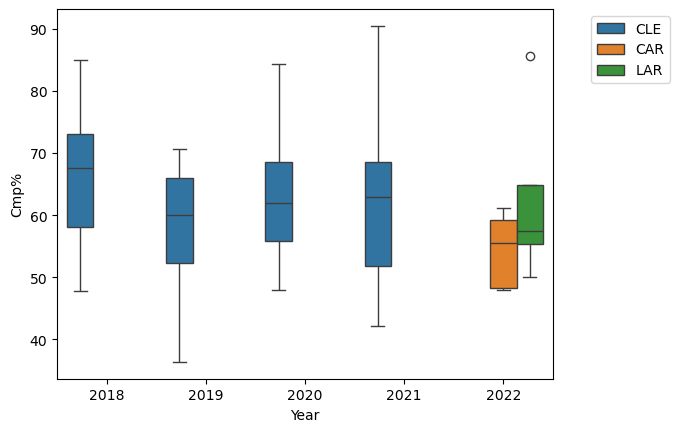

In [8]:
print(df.groupby(['Year','Tm'])[['Cmp','Att','Cmp%','Avg_Yds','Yds','TD','Int','Sk','Def-Rating','Lng',
                           'Rate','# TopReceiver','# TopRunningBacks']].describe().transpose().loc[['Cmp%'],:])

sns.boxplot(x='Year', y='Cmp%', hue='Tm',data=df)
plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')

Baker had in his Cleveland days quite the variance in his completion percentage but was overall better as his short stint with the panthers, note we only have here a sampel size of five, whoch does not say a lot but still, it was overall his worst carrer out put so far.

That Baker's stint with the panthers was overall bad, gets confirmed by the fact that we have a low standard deviation (std). In general we want a low level of standard deviation, but with the panthers it was bad, because the completion percentage was in general low.

As already mentioned, Baker had a high variance during his Celeveland days, which means his completion percentage was not consitent and flucated a lot.

We also want to check other aspects as well but do not want to check them one by one, therefore I will use from the seaborn library the catplot visual.

Cmp comparance between the different Teams Baker Mayfield played for 
 Year            2018       2019       2020       2021       2022           
Tm               CLE        CLE        CLE        CLE        CAR        LAR
Cmp count  14.000000  16.000000  18.000000  14.000000   5.000000   4.000000
    mean   22.142857  19.812500  19.388889  18.071429  16.800000  15.000000
    std     4.166850   5.980176   5.668685   3.429830   4.147288   6.055301
    min    17.000000   8.000000  10.000000  11.000000  12.000000  11.000000
    25%    18.250000  17.750000  16.000000  15.250000  14.000000  11.750000
    50%    22.000000  20.000000  20.000000  19.000000  16.000000  12.500000
    75%    24.500000  24.250000  22.750000  20.750000  20.000000  15.750000
    max    29.000000  30.000000  28.000000  23.000000  22.000000  24.000000


Att comparance between the different Teams Baker Mayfield played for 
 Year            2018       2019       2020       2021       2022           
Tm               CLE

# TopReceiver comparance between the different Teams Baker Mayfield played for 
 Year                      2018       2019       2020       2021      2022  \
Tm                         CLE        CLE        CLE        CLE       CAR   
# TopReceiver count  14.000000  16.000000  18.000000  14.000000  5.000000   
              mean    1.071429   1.187500   0.777778   0.857143  0.600000   
              std     0.997249   0.981071   0.548319   0.770329  0.547723   
              min     0.000000   0.000000   0.000000   0.000000  0.000000   
              25%     0.250000   0.750000   0.250000   0.000000  0.000000   
              50%     1.000000   1.000000   1.000000   1.000000  1.000000   
              75%     1.000000   2.000000   1.000000   1.000000  1.000000   
              max     3.000000   3.000000   2.000000   2.000000  1.000000   

Year                          
Tm                       LAR  
# TopReceiver count  4.00000  
              mean   0.50000  
              std    0.5

C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\21918843.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,6))


<Figure size 1200x600 with 0 Axes>

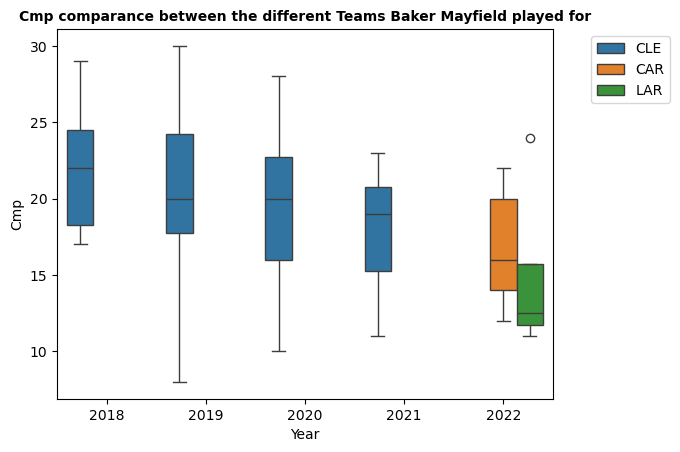

<Figure size 1200x600 with 0 Axes>

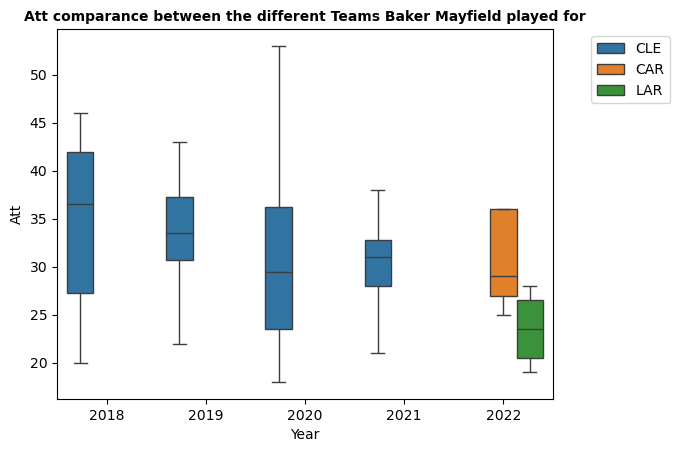

<Figure size 1200x600 with 0 Axes>

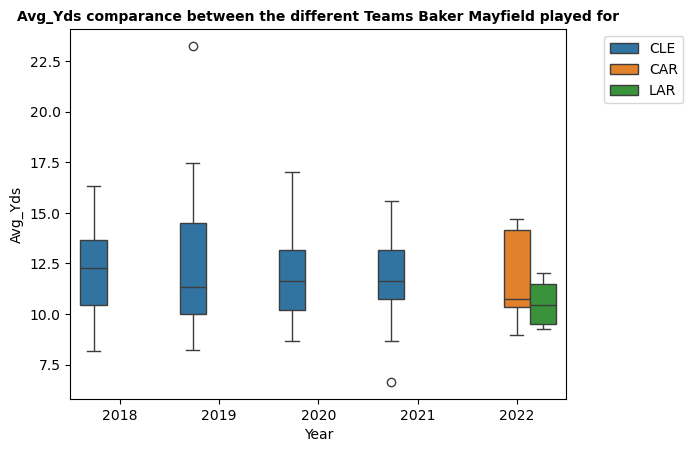

<Figure size 1200x600 with 0 Axes>

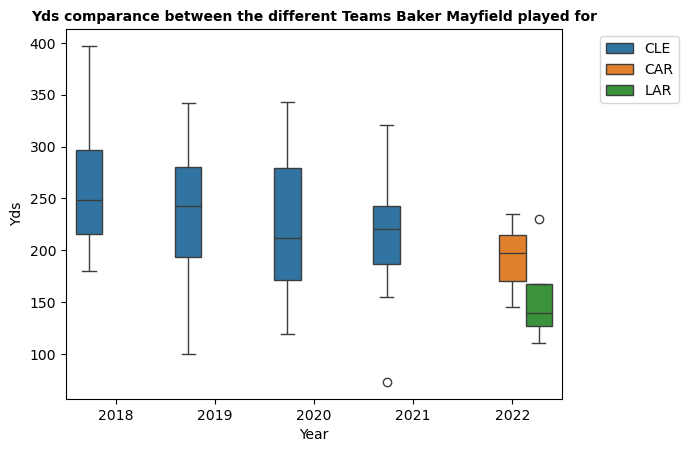

<Figure size 1200x600 with 0 Axes>

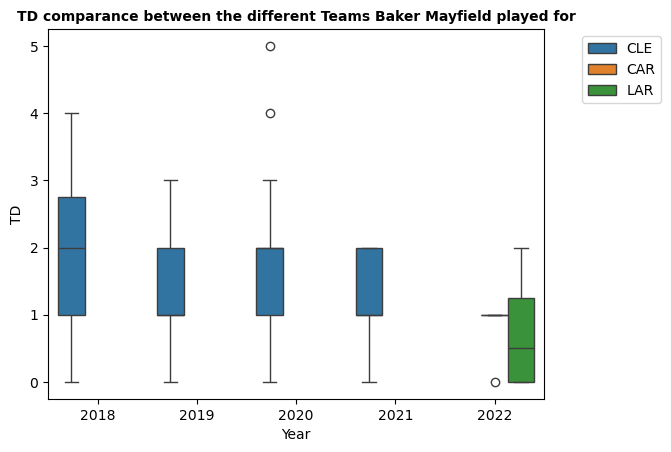

<Figure size 1200x600 with 0 Axes>

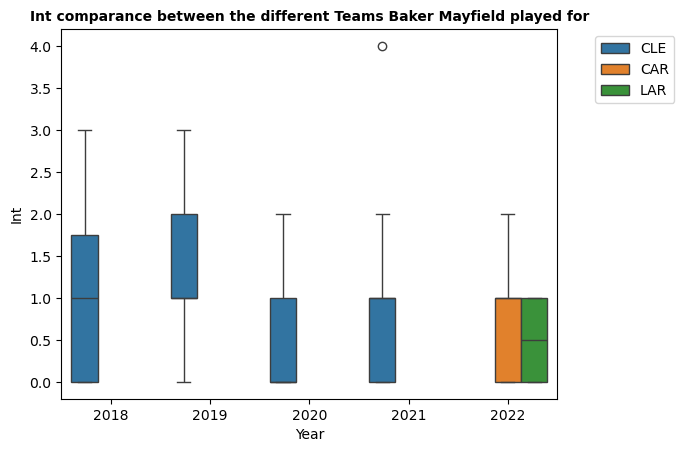

<Figure size 1200x600 with 0 Axes>

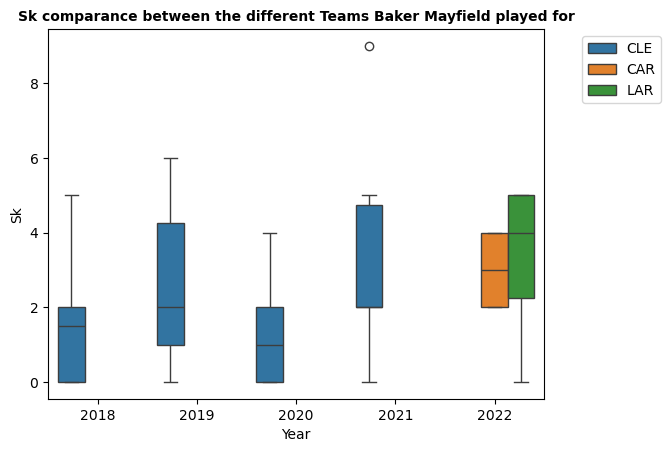

<Figure size 1200x600 with 0 Axes>

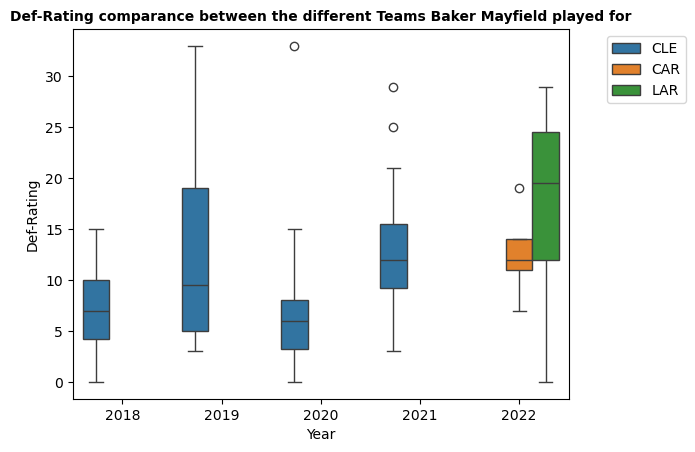

<Figure size 1200x600 with 0 Axes>

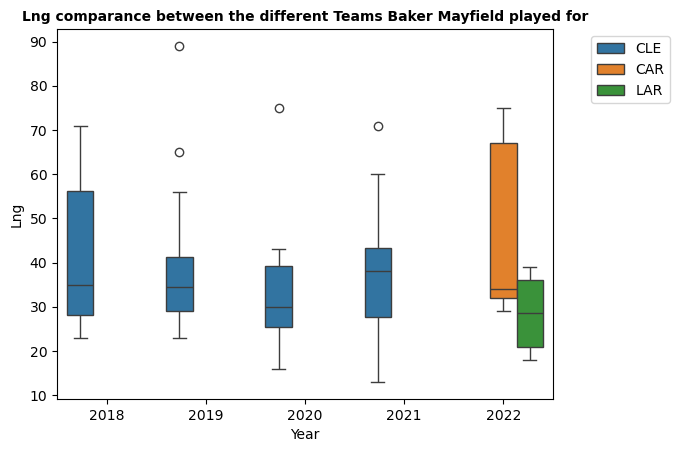

<Figure size 1200x600 with 0 Axes>

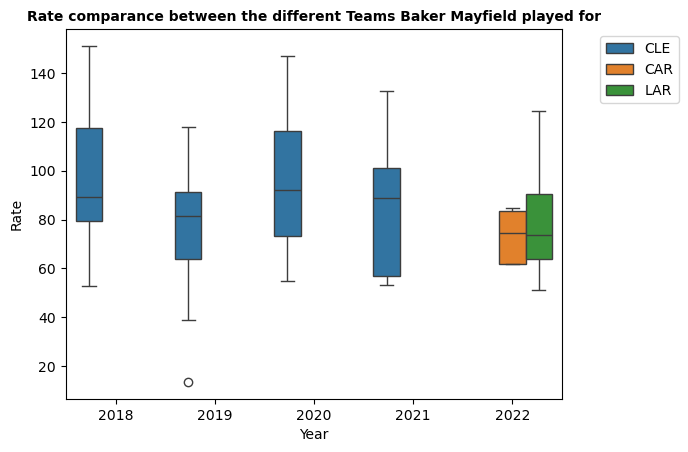

<Figure size 1200x600 with 0 Axes>

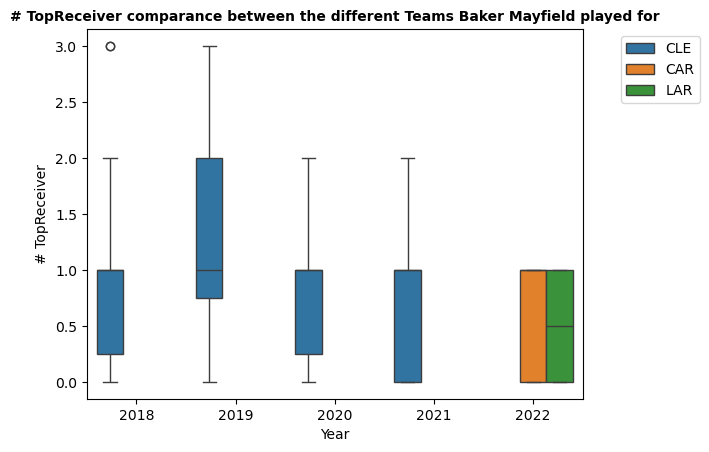

<Figure size 1200x600 with 0 Axes>

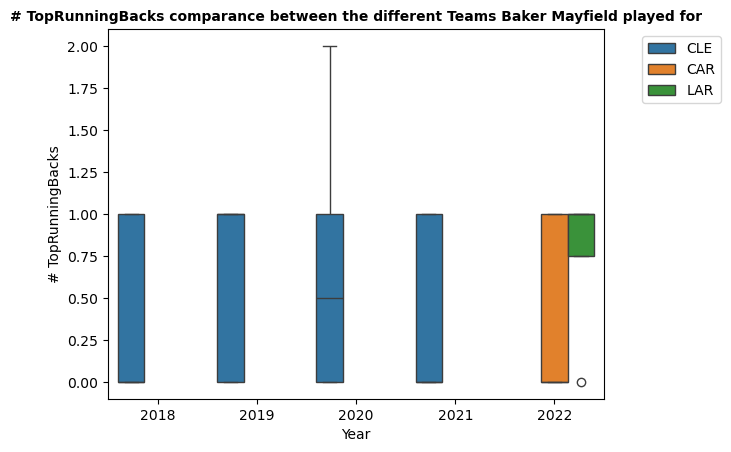

In [9]:
values=['Cmp','Att','Avg_Yds','Yds','TD','Int','Sk','Def-Rating','Lng','Rate','# TopReceiver','# TopRunningBacks']
#range_list=range(1,len(values)+1)

for x in values:
    print("{} comparance between the different Teams Baker Mayfield played for".format(x),'\n',df.groupby(['Year','Tm'])[['Cmp','Att',
    'Cmp%','Avg_Yds','Yds','TD','Int','Sk','Def-Rating','Lng','Rate','# TopReceiver','# TopRunningBacks']].describe().transpose().loc[[x],:])

    print('\n')

    plt.figure(figsize=(12,6))
    plt.subplots()
    sns.boxplot(x='Year', y=x, hue='Tm',data=df)
    plt.title("{} comparance between the different Teams Baker Mayfield played for".format(x), size=10, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')

##### Avg_Yds
When Baker started for the Rams, he had the lowest Avg_Yds by completed passes, in his career. What is really interesting when Baker completed a pass with the panthers they generated on average a lot of yards.

##### Yds
When it comes to the game by game passing yards, we can see that Baker had the lowest output with the Rams. As a Panthers QB his game by game passing yards performance was better as with the Rams, but it is not as good as it was back then when he was the starting QB for the Browns

##### TD
When it comes to touchdown passes Baker had the lowest/worse output with the Panthers.

##### Sk/Sacks
What we can see at Sacks is that with the Panthers, Baker did not have a single game where he did not get sacked in a game. This could be a reason for the low completion percentage. Baker apparently did not get enough time to find his target and had to hurry his passing attempts, because of a weak O-line. It would be really handy to get data where we can check how much time Baker took to throw the ball.

##### Def-Rating
When we look at the self created defence metric, we can see that the Cleveland struggeld the most with the opponent's defences. Suprisingly the Panthers did perform relatively well.

##### Lng
Here we can see that Baker had the longest completed passes within a passing attempt & completion with the Panthers. When we combine the longest completed pass with the Def-Rating we can see that the Panthers O-Line was able to protect Baker enough times so he could bring on a deep pass. It would be really interesting to analyse the snap by snap data of Baker's games, so we could see what his completion % for deep passing attempts were. With the avaible data we get the impression that the Panthers tend to have more plays where they went depp, but Baker struggels/struggeld with his depp accuracy.

##### Rating
Baker had in his Cleveland days a lot of up and downs/varaince in his QB rating, but on average he was more efficent compare to his Panthers stint, he relatively recovered with the Rams but as we already know his average completed passing yards where not that high, which leads us to the last two aspects, receiver and runningbacks.

##### Top Wide Receiver & RunningBacks
Here it is to mention that Baker never had a receiver with the Panthers that accumulated 75 yards in a game. When he was with the Browns he had apparently more weapons. Regarding the rushing yards, in 2020 Baker had at least one game where he had two players which accomplished 100 yards rushing. With the Rams the output was even better but we need to mention that the result was accomplished within a four game period.

Next, we want to see against which team did Baker perform the best. It is important to mention that Baker did play from 2018-2021 against the Ravens, Steels and Bengals twice, because they are in the same divison, but he might have played against other teams more then once. To get a fair comparance will get the mean of the different metrics.

In [10]:
Opponent=df.groupby(['Opponent'])[['Cmp','Att','Cmp%','Avg_Yds','Yds',
'TD','Int','Sk','Def-Rating','Lng','Rate','# TopReceiver','# TopRunningBacks']].mean()
Opponent['Cmp']=round(Opponent['Cmp'],2)
Opponent['Att']=round(Opponent['Att'],2)
Opponent['Cmp%']=round(Opponent['Cmp%'],2)
Opponent['Yds']=round(Opponent['Yds'],2)
Opponent['Avg_Yds']=round(Opponent['Avg_Yds'],2)
Opponent['TD']=round(Opponent['TD'],0).astype(int)
Opponent['Int']=round(Opponent['Int'],0).astype(int)
Opponent['Sk']=round(Opponent['Sk'],0).astype(int)
Opponent['Def-Rating']=round(Opponent['Def-Rating'],2)
Opponent['Lng']=round(Opponent['Lng'],2)
Opponent['Rate']=round(Opponent['Rate'],2)
Opponent['# TopReceiver']=Opponent['# TopReceiver'].astype(int)
Opponent['# TopRunningBacks']=Opponent['# TopRunningBacks'].astype(int)
Opponent

,Cmp,Att,Cmp%,Avg_Yds,Yds,TD,Int,Sk,Def-Rating,Lng,Rate,# TopReceiver,# TopRunningBacks
Opponent,,,,,,,,,,,,,
ARI,23.67,35.67,66.25,9.83,226.00,2,1,3,12.33,39.00,84.77,1,0
ATL,17.00,20.00,85.00,12.71,216.00,3,0,0,0.00,28.00,151.20,0,1
BAL,22.12,37.88,58.88,12.54,277.62,2,1,1,6.12,40.62,83.92,2,0
BUF,26.00,38.00,68.42,9.15,238.00,2,0,2,5.00,24.00,102.70,1,1
CAR,18.00,22.00,81.82,13.22,238.00,1,0,1,5.00,66.00,126.90,1,0
CHI,19.00,31.00,61.29,12.95,246.00,1,0,5,16.00,26.00,97.00,1,0
CIN,17.29,26.57,64.45,15.37,249.57,3,1,1,9.00,45.43,109.01,1,1
CLE,16.00,27.00,59.26,14.69,235.00,1,1,4,19.00,75.00,84.60,1,0
DAL,19.00,30.00,63.33,8.68,165.00,2,0,2,7.00,16.00,100.00,1,0


Next, we will create a def function which will allow us to display the different metrics with less code as possible.

In [11]:
def opponent_metric(x):
    color=['firebrick','maroon','indigo','blue','deepskyblue','darkblue','orange','brown','gray','darkorange','silver',
          'forestgreen','mediumblue','steelblue','black','red','dodgerblue','gold','dimgray','aqua','darkviolet','darkgoldenrod',
          'navy','midnightblue','green','dimgray','mediumseagreen','yellow','lightgreen','crimson','lightcoral','cyan','indianred']
    plt.figure(figsize=(12,8))
    Opponent[x].plot(kind='bar', color=color)
    plt.axhline(Opponent[x].max(), linestyle='--',color='black')
    plt.axhline(Opponent[x].min(), linestyle='--',color='red')
    plt.title("Avg {} against all the Teams that Baker Mayfield has faced in his Career".format(x))

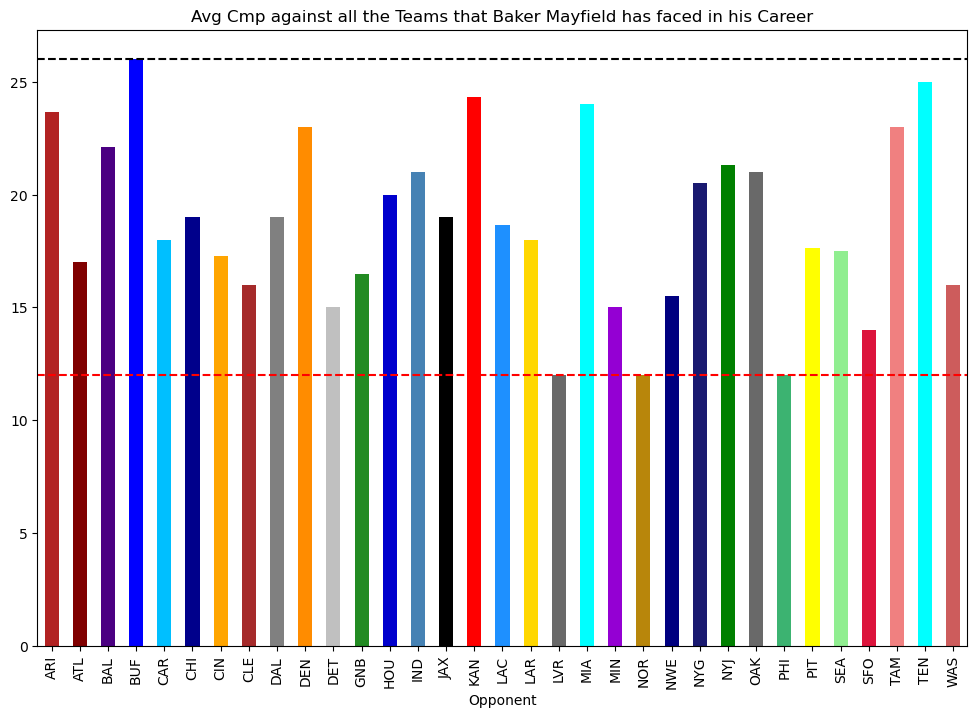

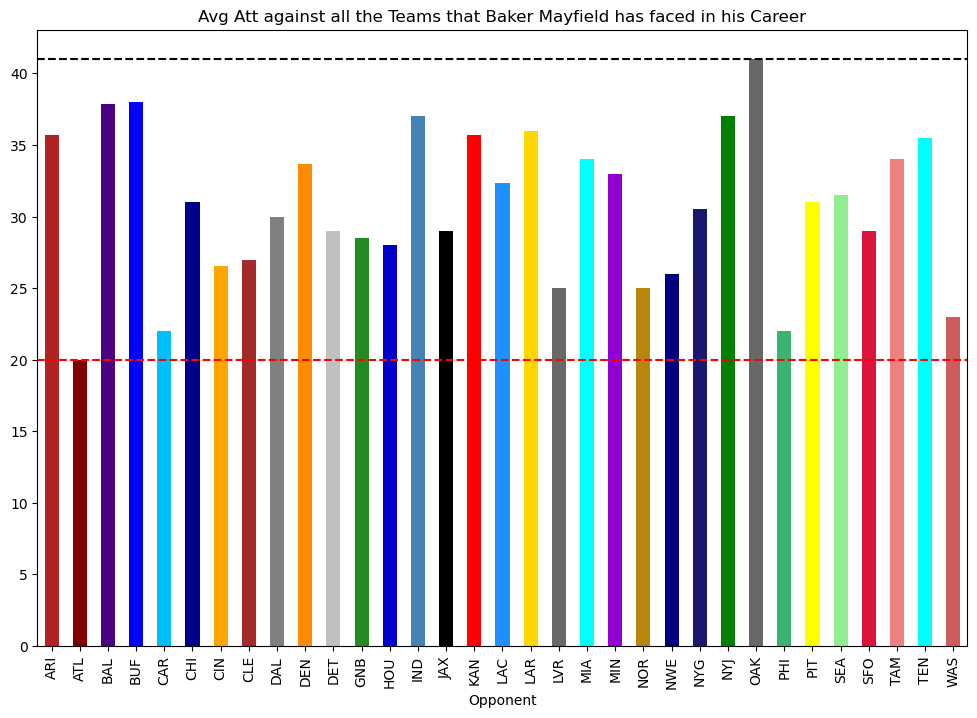

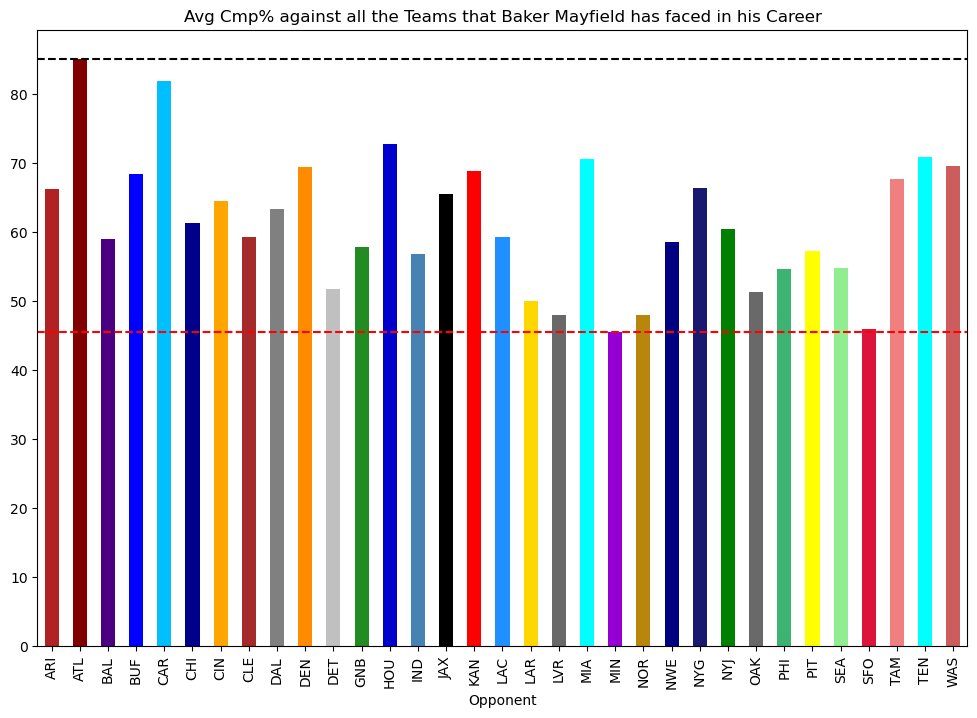

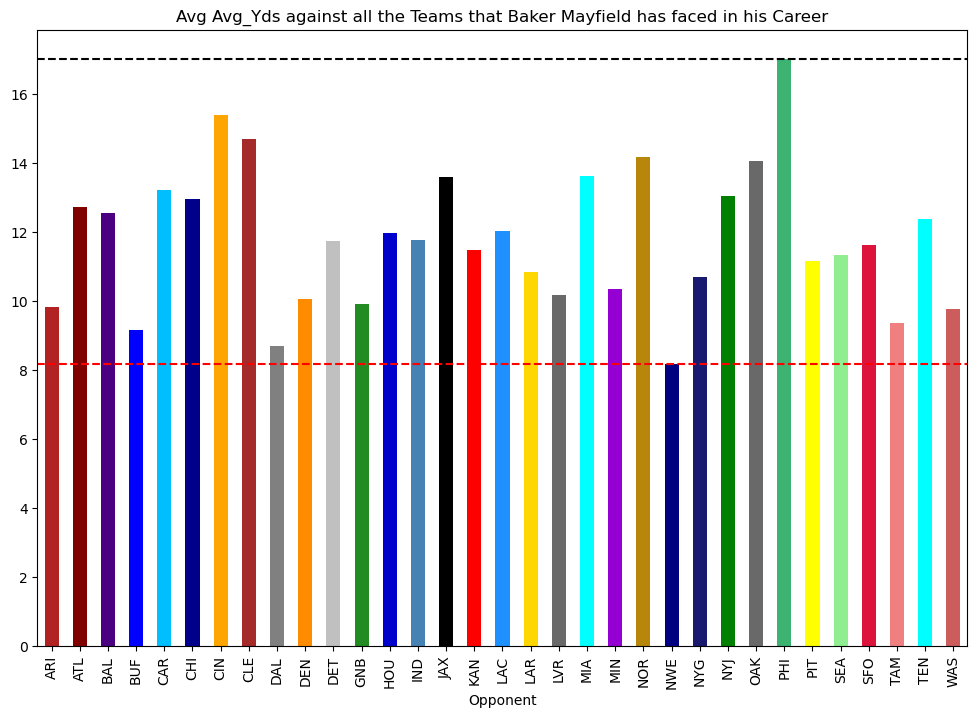

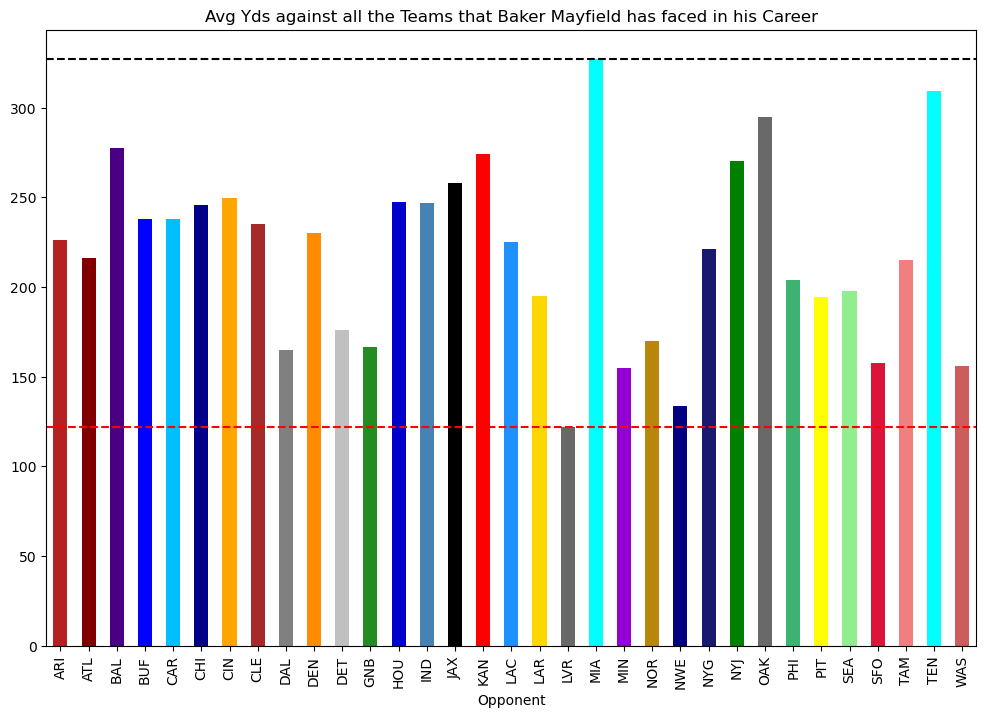

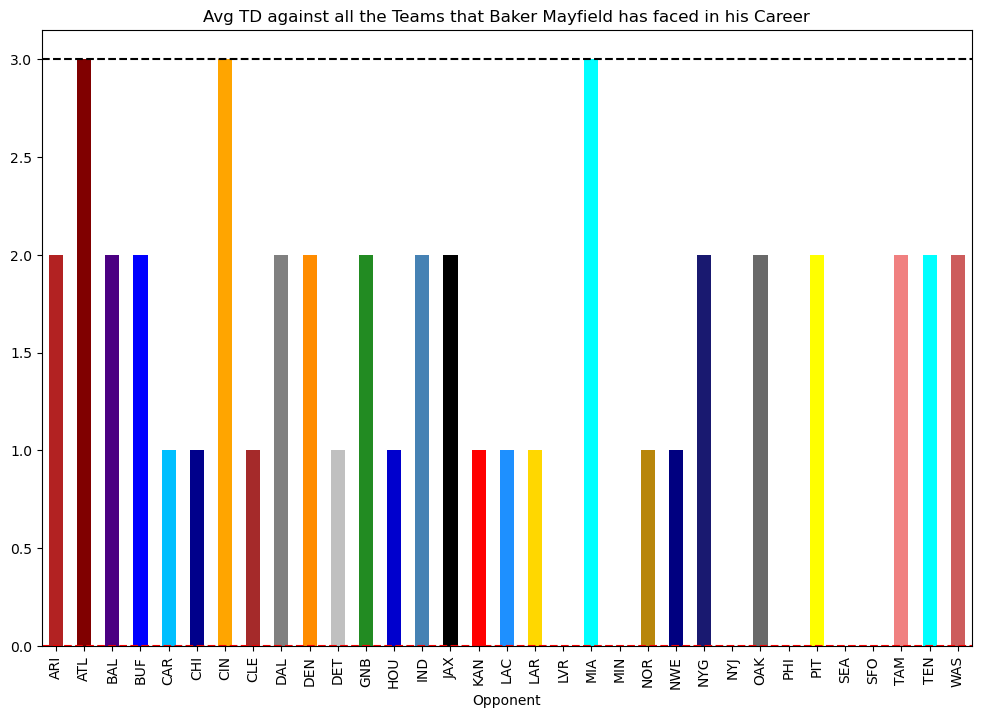

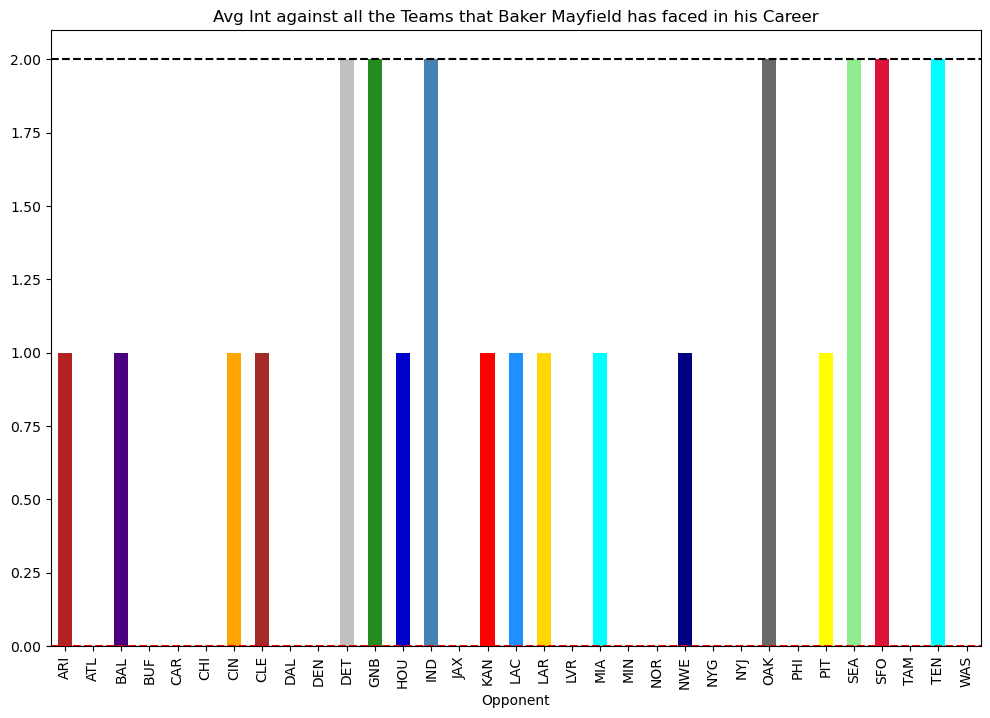

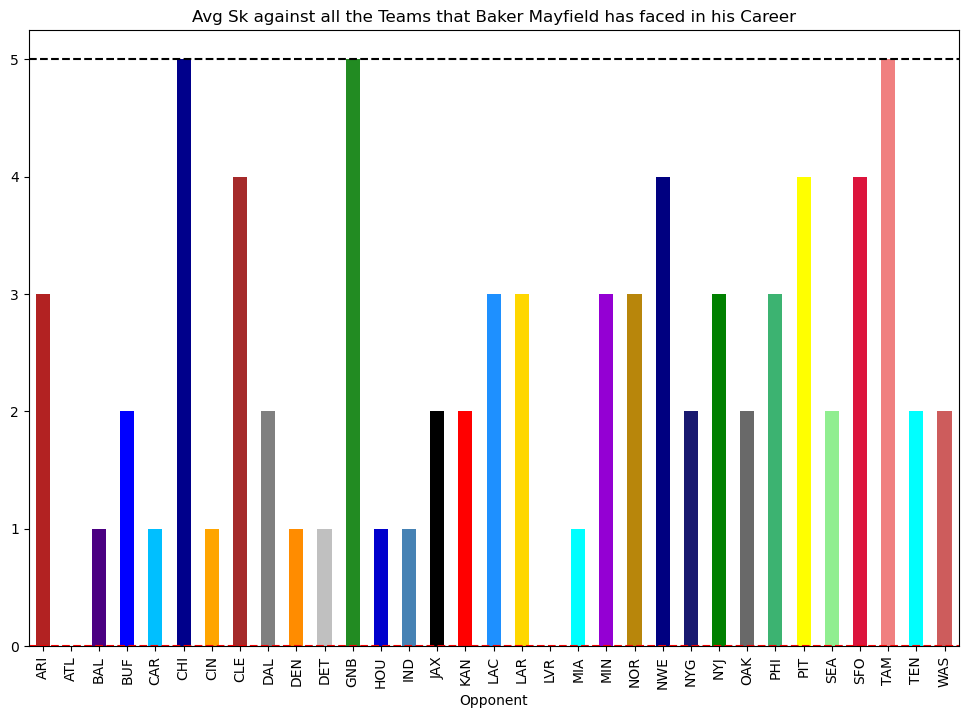

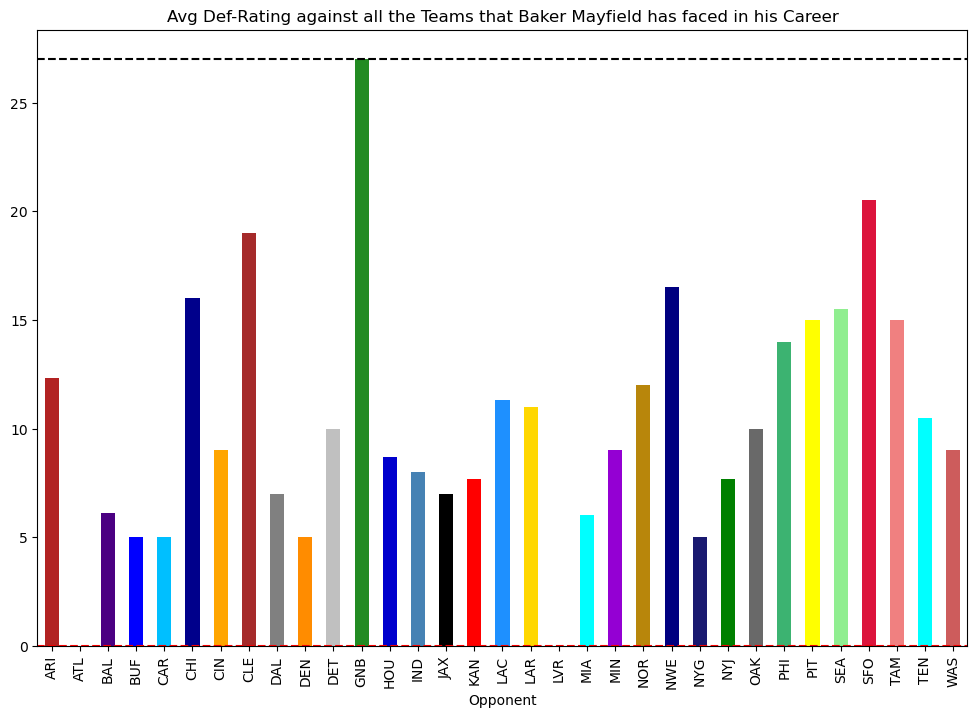

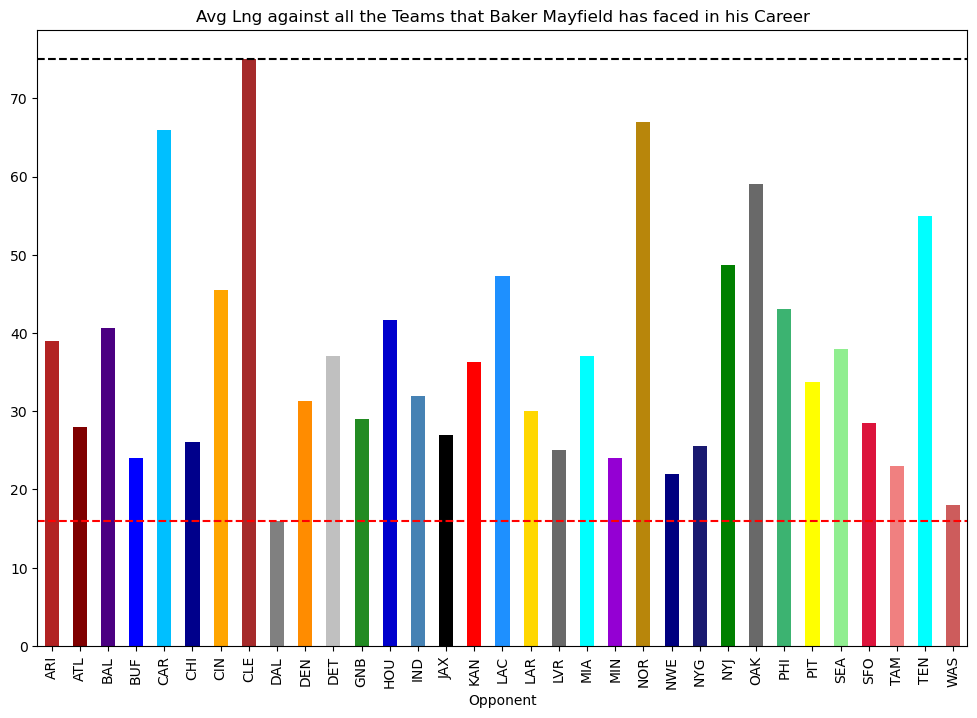

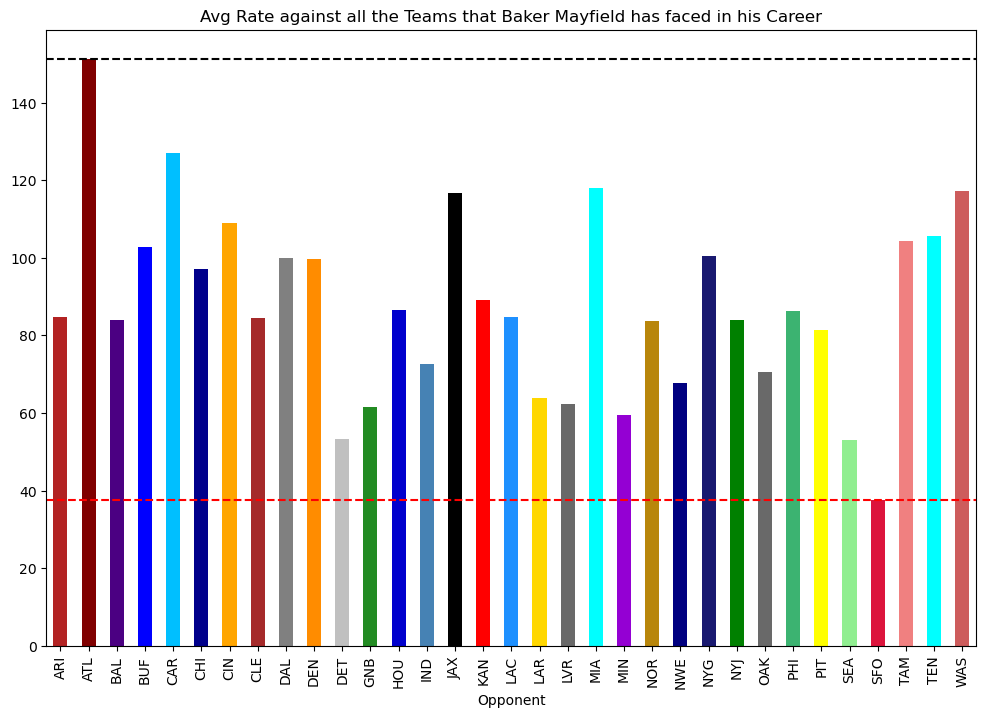

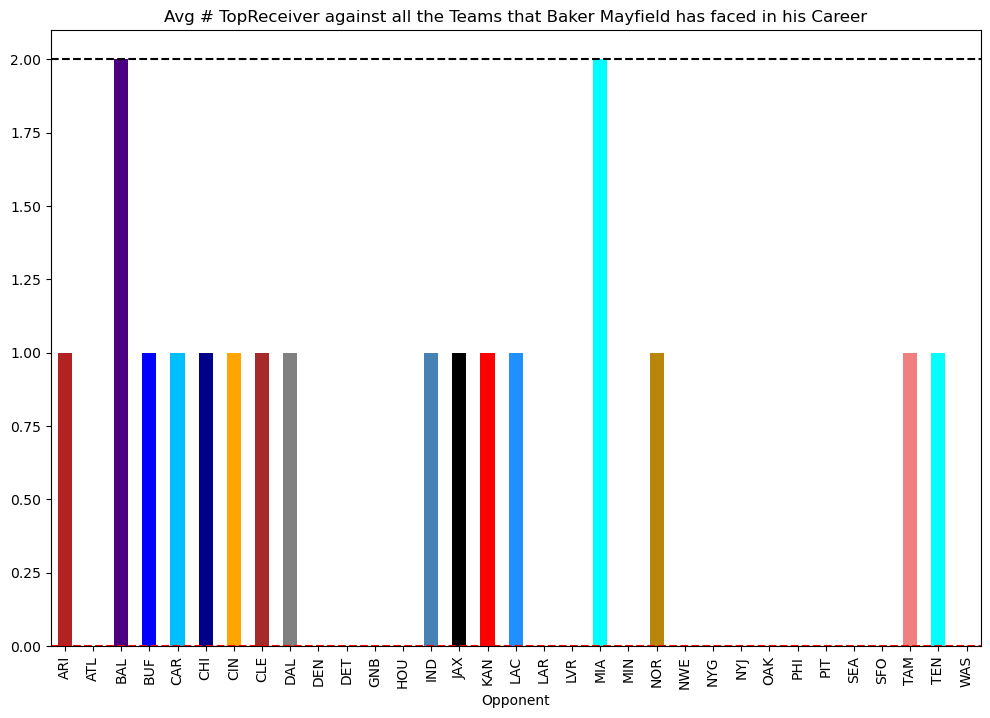

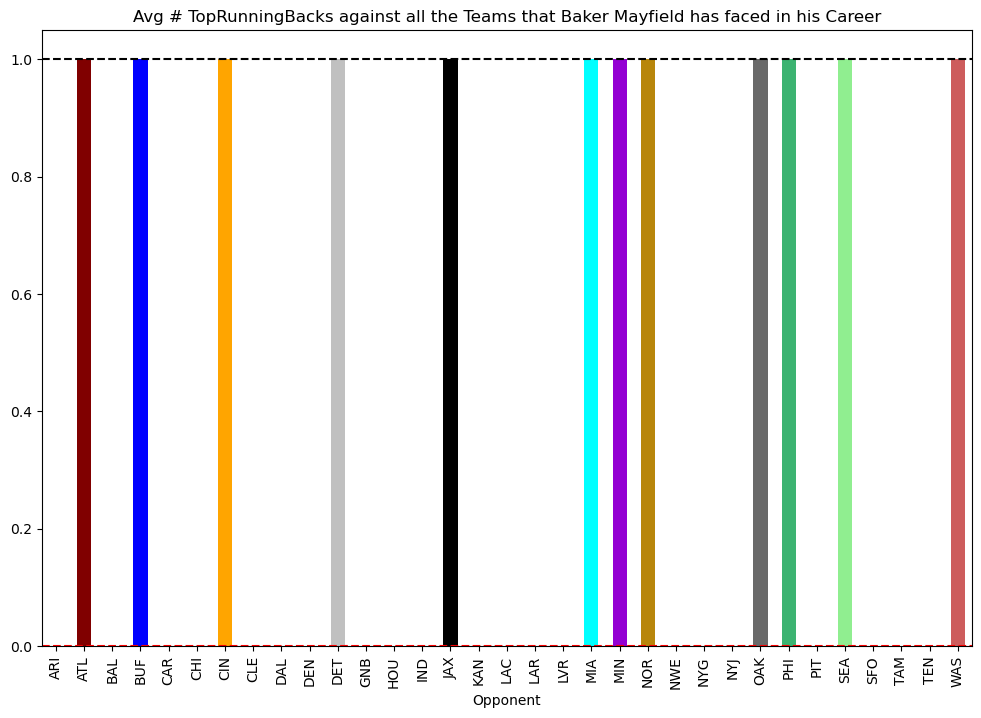

In [12]:
metrics=['Cmp','Att','Cmp%','Avg_Yds','Yds',
'TD','Int','Sk','Def-Rating','Lng','Rate','# TopReceiver','# TopRunningBacks']

for x in metrics:
    opponent_metric(x)

## Feature Selection
In this project we want to predict the passing yards performance of Baker Mayfield, therefore we will perform a couple of methods/approach to determine which features are the most important ones.

In [13]:
df.drop(columns=['Player','Tm','Opponent'],axis=1).corr()['Yds'].sort_values(ascending=False).to_frame()[1:]

,Yds
Cmp,0.730665
Att,0.575183
Lng,0.528282
# TopReceiver,0.482901
Avg_Yds,0.462366
Rate,0.406051
TD,0.403665
Cmp%,0.365569
Int,0.173586
Home Game,-0.045251


<Axes: >

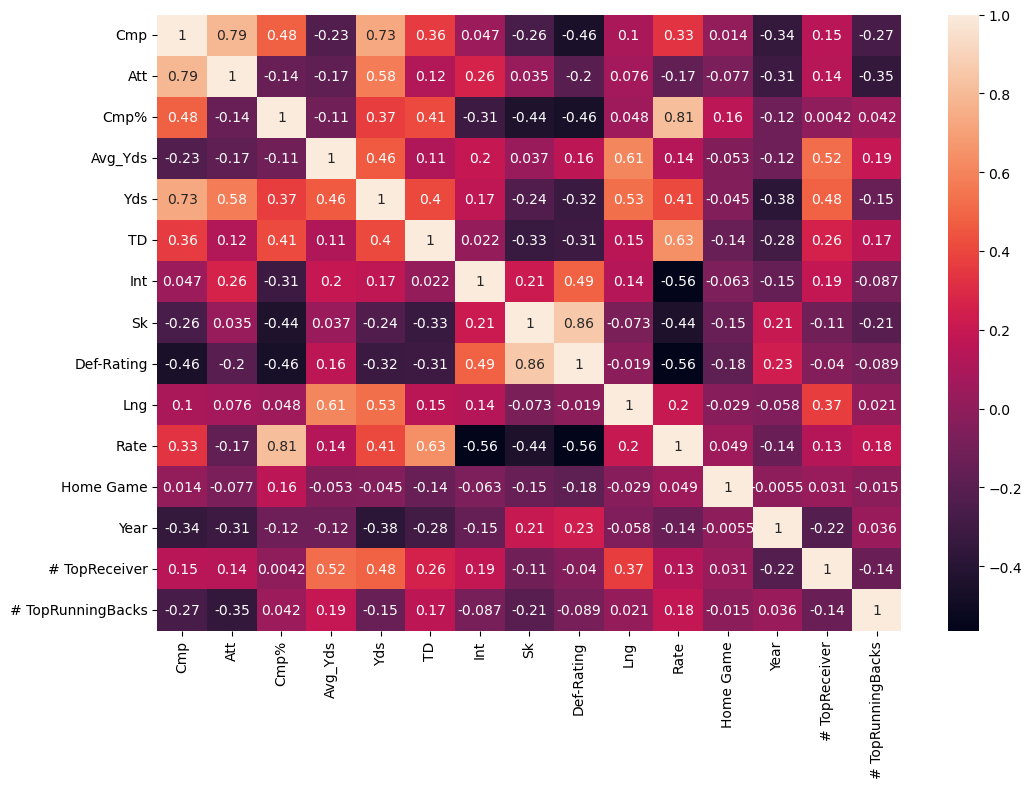

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Player','Tm','Opponent'],axis=1).corr(), annot=True)

<Axes: >

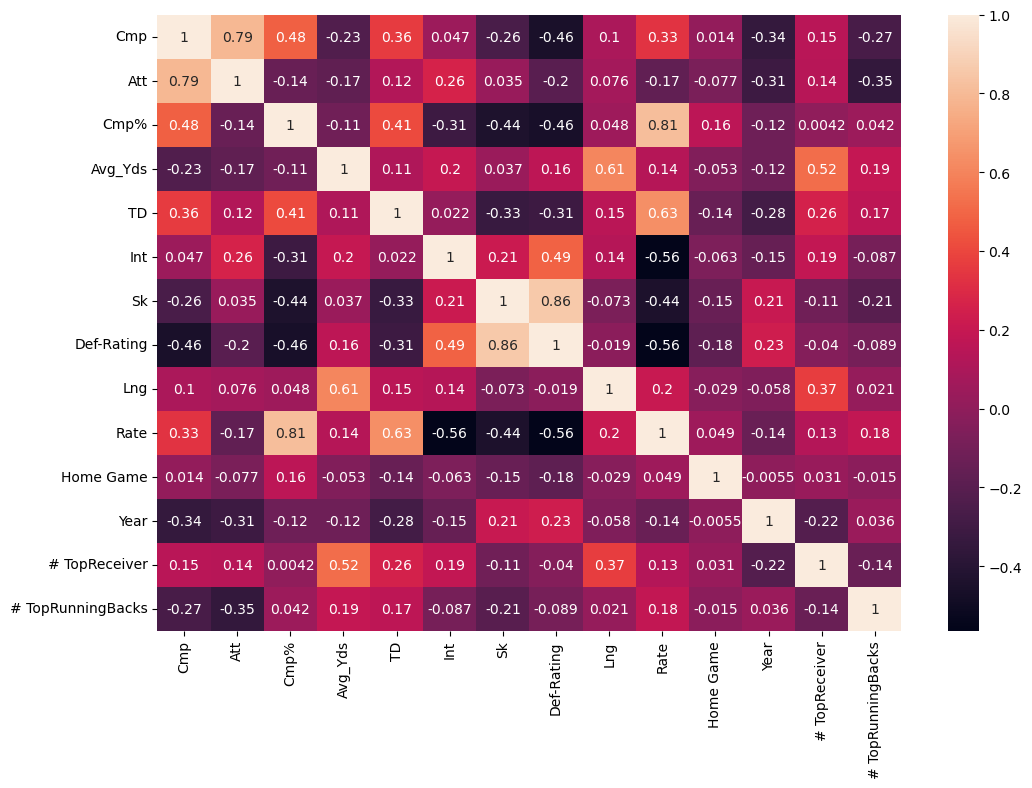

In [18]:
# heatmap without y feature to check for autocorrelation
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Player','Tm','Opponent','Yds'], axis=1).corr(), annot=True)

The second heatmap test for autocorrelation, in other words we check how strong the x features correlate with each other. The features like Cmp-Att, Rate-Cmp%, Def-Rating-Sk, Def-Rating-Rate.  These aspects should and need to be considered in the models.

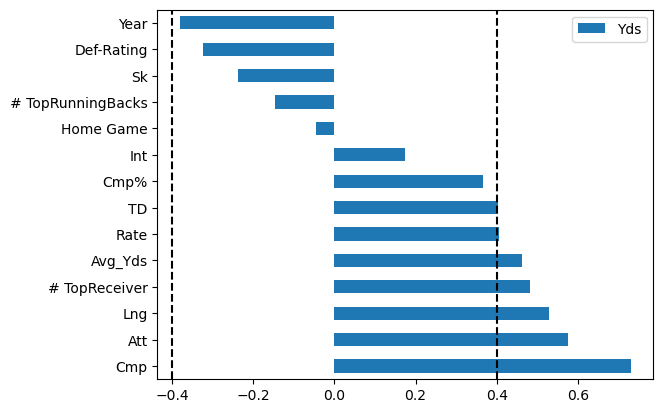

In [21]:
df.drop(['Player','Tm','Opponent'],axis=1).corr()['Yds'].sort_values(ascending=False).to_frame()[1:].plot(kind='barh')
plt.axvline(0.4,linestyle='--',color='black')
plt.axvline(-0.4,linestyle='--',color='black')

Based on the correlation and heatmap teh most important features are:


1.   Comp
2.   Att
1.   #TopReceiver
2.   Avg_Yds
1.   TD
2.   Cmp%

I did not included Rating, because we want to predict how many passing yards Baker will generate in a game, using a high rating whould imply that Baker might have a relativley good passing performance, ergo, a high amount of passing yards.

To get a more sophisticaated apporach will perform a K-Best and RBF analysis to find the most important features. A quick outline how these to models will work together. With the K-Best we will get the number of important features that the data set contains and with the RBF analysis, we will get the name of the features, so that we know which to pick.

First we need to allocate our data to the X and y features.

In [23]:
X=pd.get_dummies(df.drop(['Yds','Player', 'Tm', 'Year'], axis=1),drop_first=True)

X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

y=df['Yds']

# here we can see we have generated dummy variables for the categorical values
X.head()

C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\350670577.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Cmp,Att,Cmp%,Avg_Yds,TD,Int,Sk,Def-Rating,Lng,Rate,...,Opponent_NYG,Opponent_NYJ,Opponent_OAK,Opponent_PHI,Opponent_PIT,Opponent_SEA,Opponent_SFO,Opponent_TAM,Opponent_TEN,Opponent_WAS
0,17,23,73.91,11.82,0,0,1,4.0,29.0,100.1,...,0,1,0,0,0,0,0,0,0,0
1,21,41,51.22,14.05,2,2,2,10.0,59.0,70.7,...,0,0,1,0,0,0,0,0,0,0
2,25,43,58.14,13.68,1,1,5,14.0,39.0,81.7,...,0,0,0,0,0,0,0,0,0,0
3,22,46,47.83,10.82,1,2,5,15.0,32.0,52.6,...,0,0,0,0,0,0,0,0,0,0
4,23,34,67.65,9.35,2,0,5,15.0,23.0,104.4,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# these are the different columns that we have generated through the dummy process
print(X.columns)

# the total number of all available features
print("Number of Columns after dummy variables where created: ",len(X.columns))

Index(['Cmp', 'Att', 'Cmp%', 'Avg_Yds', 'TD', 'Int', 'Sk', 'Def-Rating', 'Lng',
       'Rate', 'Home Game', '# TopReceiver', '# TopRunningBacks',
       'Opponent_ATL', 'Opponent_BAL', 'Opponent_BUF', 'Opponent_CAR',
       'Opponent_CHI', 'Opponent_CIN', 'Opponent_CLE', 'Opponent_DAL',
       'Opponent_DEN', 'Opponent_DET', 'Opponent_GNB', 'Opponent_HOU',
       'Opponent_IND', 'Opponent_JAX', 'Opponent_KAN', 'Opponent_LAC',
       'Opponent_LAR', 'Opponent_LVR', 'Opponent_MIA', 'Opponent_MIN',
       'Opponent_NOR', 'Opponent_NWE', 'Opponent_NYG', 'Opponent_NYJ',
       'Opponent_OAK', 'Opponent_PHI', 'Opponent_PIT', 'Opponent_SEA',
       'Opponent_SFO', 'Opponent_TAM', 'Opponent_TEN', 'Opponent_WAS'],
      dtype='object')
Number of Columns after dummy variables where created:  45


C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\2331872740.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.sort_values(ascending=False).nlargest(6)[-1]
C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\2331872740.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(result.sort_values(ascending=False).nlargest(6)[-1],linestyle='--',color='black')


Cmp        63.640111
Lng        23.959460
Att        20.213530
Rate       16.615454
Avg_Yds    15.176035
Cmp%       12.292764
dtype: float64

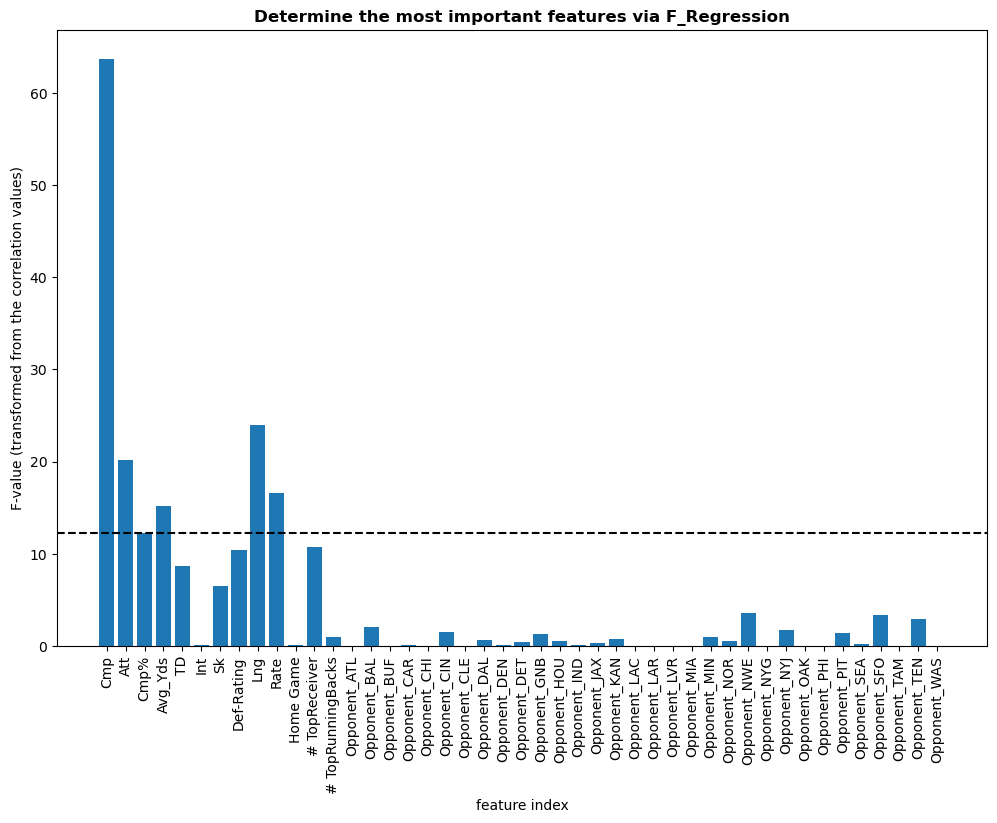

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(X_train, y_train)
X_train_fs=f_selector.transform(X_train)
X_test_fs=f_selector.transform(X_test)

plt.figure(figsize=(12,8))
plt.bar([i for i in X.columns.to_list()], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.xticks(rotation=90)
plt.title("Determine the most important features via F_Regression",size=12,fontweight='bold')

result=pd.Series(f_selector.scores_)
result.index=X_train.columns
result.sort_values(ascending=False).nlargest(6)[-1]

plt.axhline(result.sort_values(ascending=False).nlargest(6)[-1],linestyle='--',color='black')

result.sort_values(ascending=False).nlargest(6)

Here we have used the F-value to determine which X feature hast the strongest linear relationship with the y fature. The f regression is commonly for feature selection.

Based on the outcome of the correlation and heatmap, we have decided to pick the six strongest features, therefore we have checked the six most important features based on the F-value and we get an familar picture, almost every feature is matching.

Next, we will do the same, but instead of the f regression score we will use the mutual info score.

C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\3449088683.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(result_m.sort_values(ascending=False).nlargest(6)[-1],linestyle='--',color='black')


Cmp           0.356315
Att           0.287912
Cmp%          0.248194
Rate          0.211528
TD            0.151443
Def-Rating    0.145541
dtype: float64

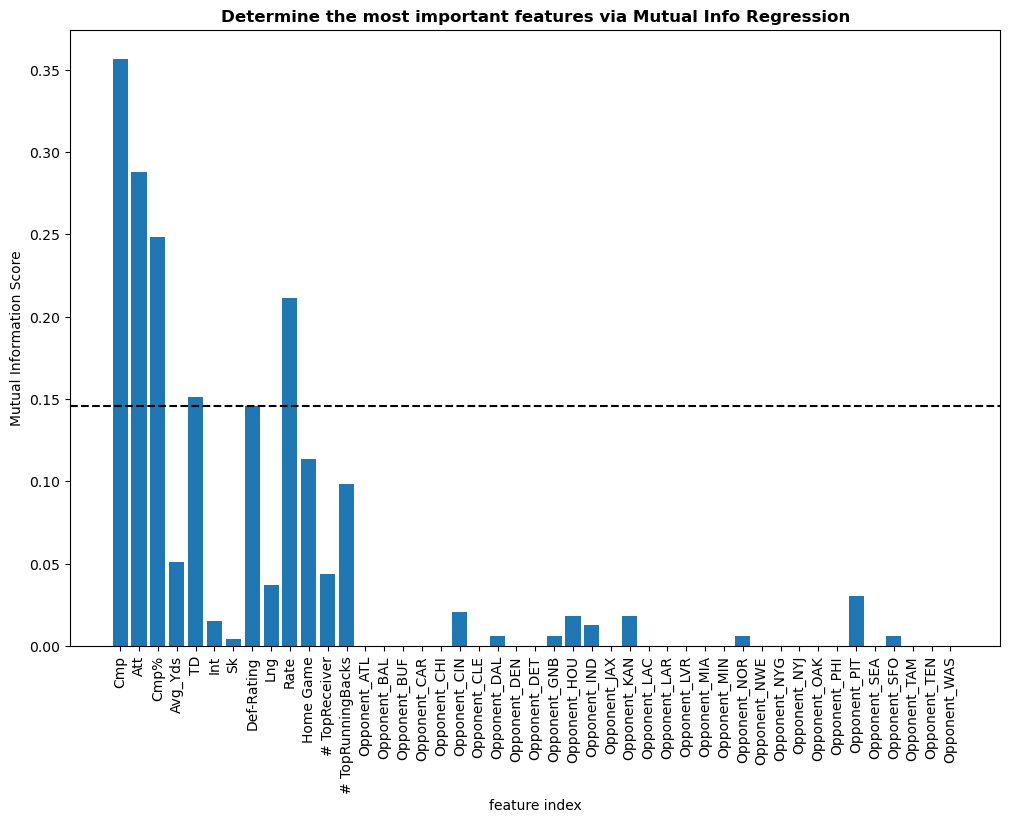

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

mi_selector = SelectKBest(score_func=mutual_info_regression, k='all')
mi_selector.fit(X_train, y_train)
X_train_mi=mi_selector.transform(X_train)
X_test_mi=mi_selector.transform(X_test)

plt.figure(figsize=(12,8))
plt.bar([i for i in X.columns.to_list()], mi_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=90)
plt.title("Determine the most important features via Mutual Info Regression",size=12,fontweight='bold')

result_m=pd.Series(mi_selector.scores_)
result_m.index=X_train.columns
result_m.sort_values(ascending=False).nlargest(6)

plt.axhline(result_m.sort_values(ascending=False).nlargest(6)[-1],linestyle='--',color='black')

result_m.sort_values(ascending=False).nlargest(6)

The mutual info score allows to get the association level between the X and y features, the higher the score the more depedent they are. The difference to the F-value/F Regression is, that the mutual info score does not relie just on the linear relationship of the features, it can pick up any kind of dependency.

The feature selection with the mutual info score gives ous a rather familar output, but we have a few different features.


We have to face a really difficult situation here, based on the feature selection we should not use all features, but we want to use the model to predict the most accurate outcome of possible passing performances of Baker Mayfield. Therefore we will move on with all avaiable feature. But we should keep in mind that to use the approach when we we have more available features or when the dummy variables are not that important as in our model.

Next, we will check the distribution of our data to see what kind of scaler do we need for our models.

## Distribution of the features

C:\Users\gandj\AppData\Local\Temp\ipykernel_19436\1212303859.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(1,1)


<Figure size 1200x600 with 0 Axes>

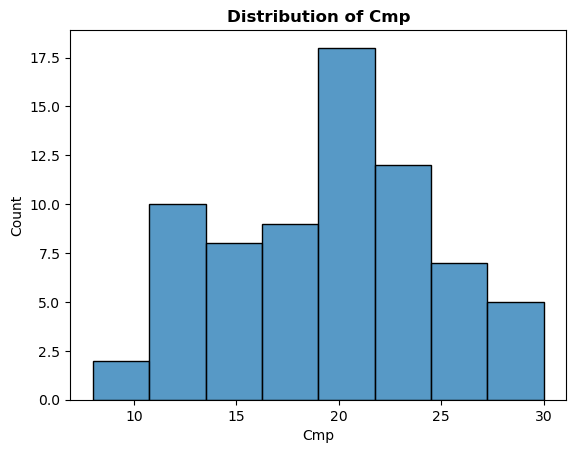

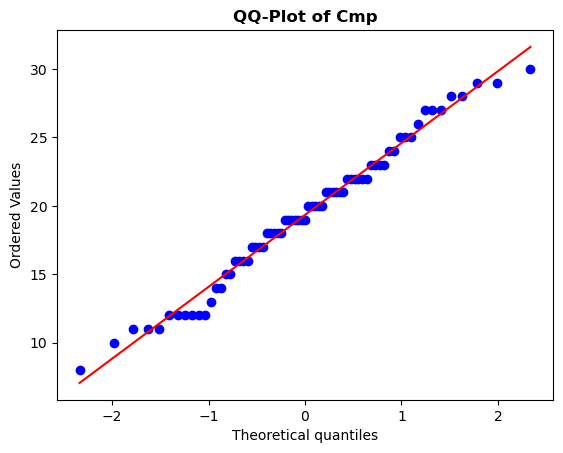

<Figure size 1200x600 with 0 Axes>

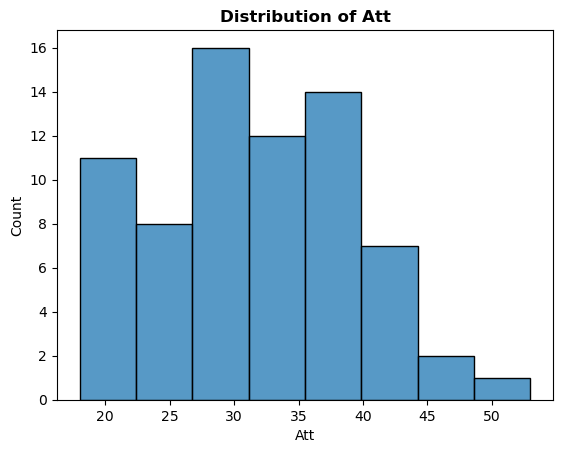

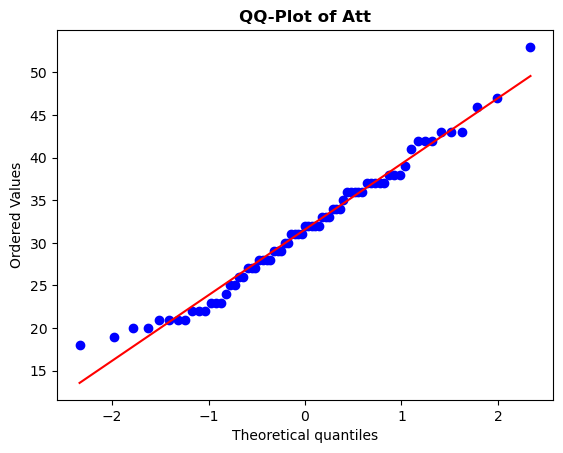

<Figure size 1200x600 with 0 Axes>

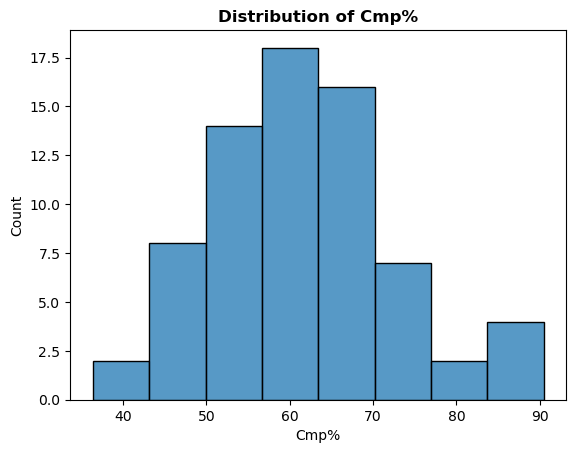

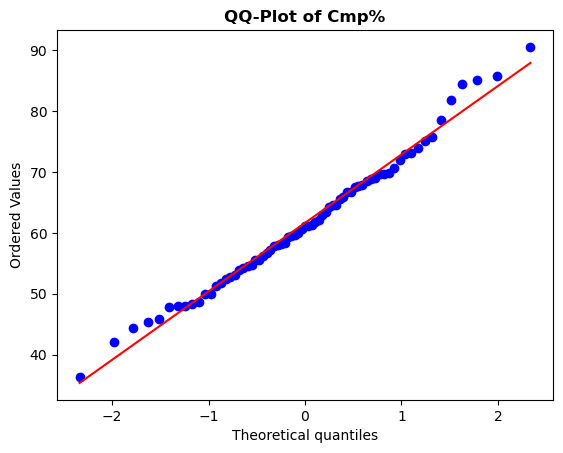

<Figure size 1200x600 with 0 Axes>

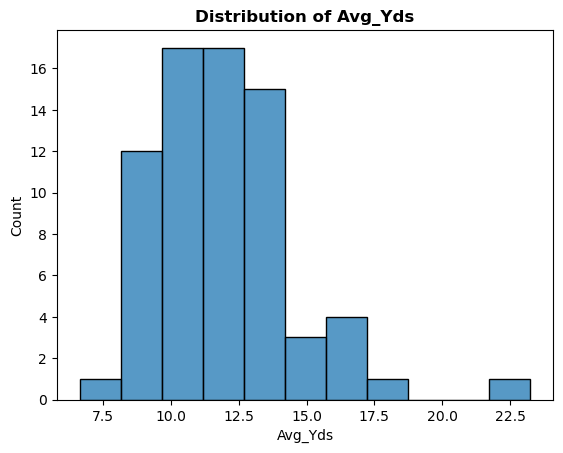

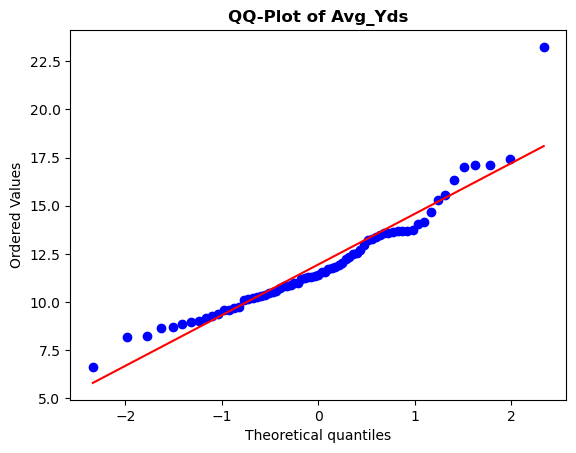

<Figure size 1200x600 with 0 Axes>

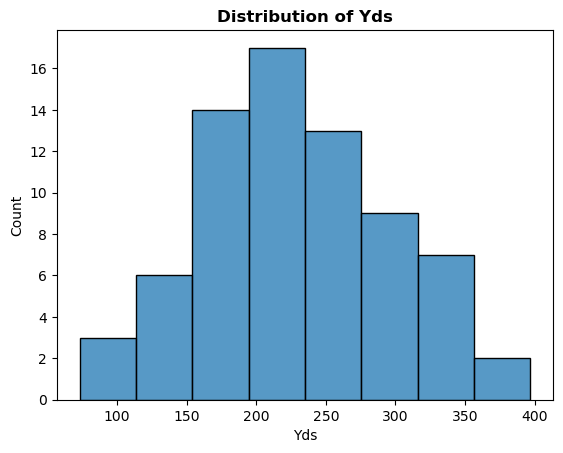

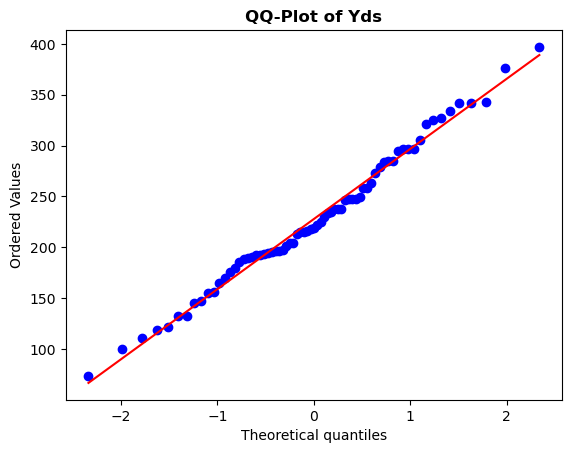

<Figure size 1200x600 with 0 Axes>

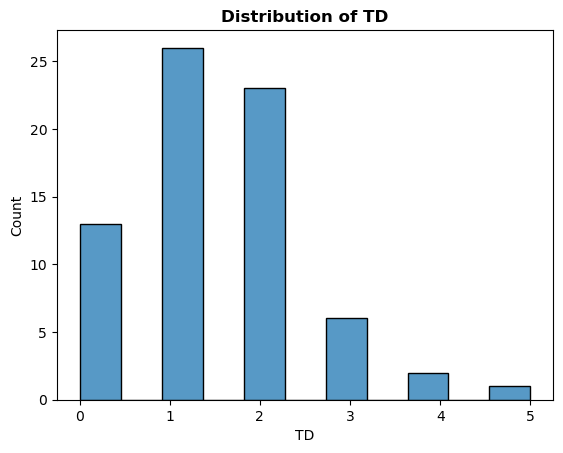

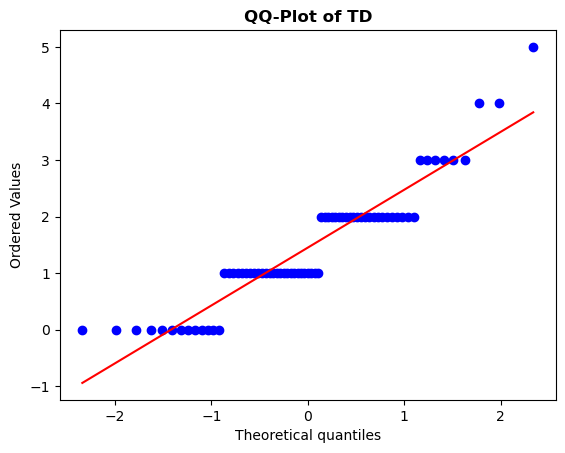

<Figure size 1200x600 with 0 Axes>

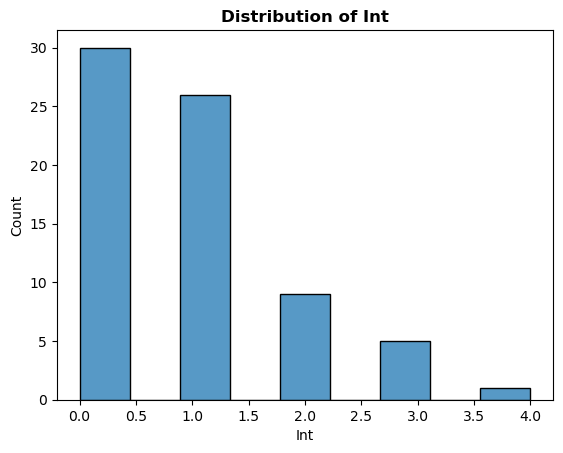

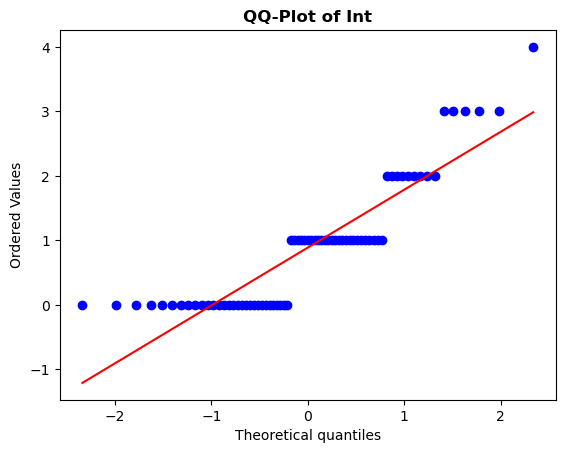

<Figure size 1200x600 with 0 Axes>

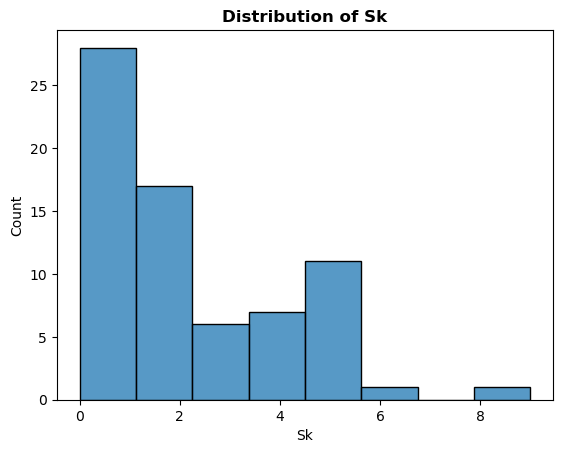

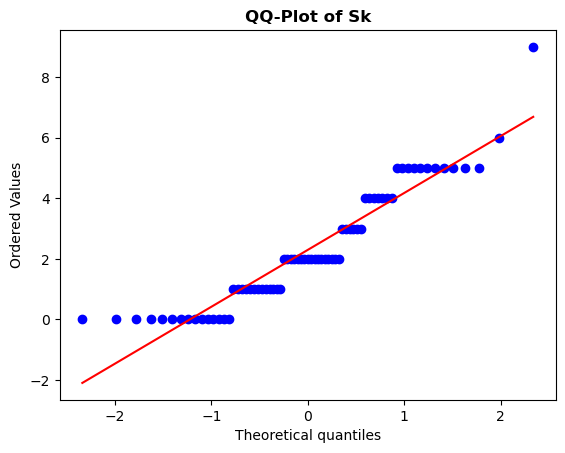

<Figure size 1200x600 with 0 Axes>

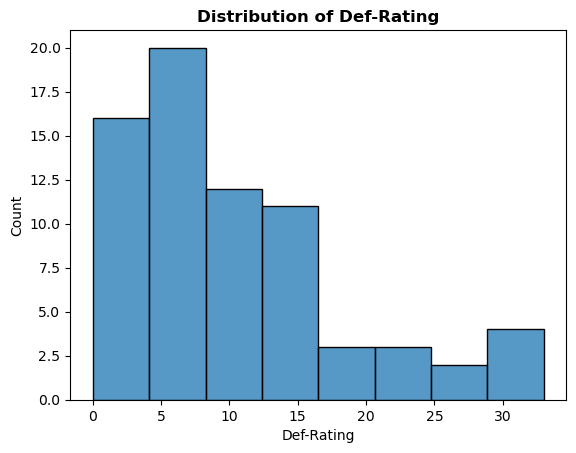

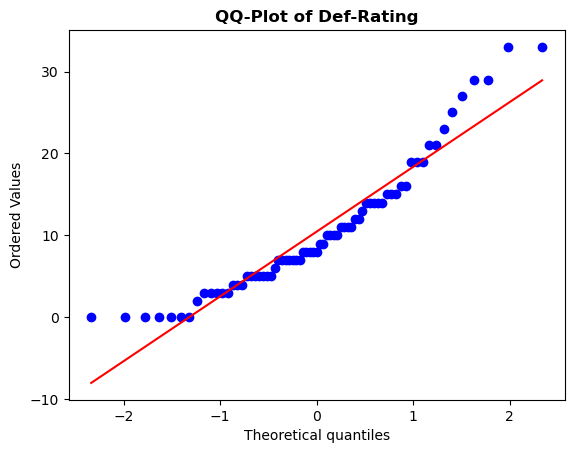

<Figure size 1200x600 with 0 Axes>

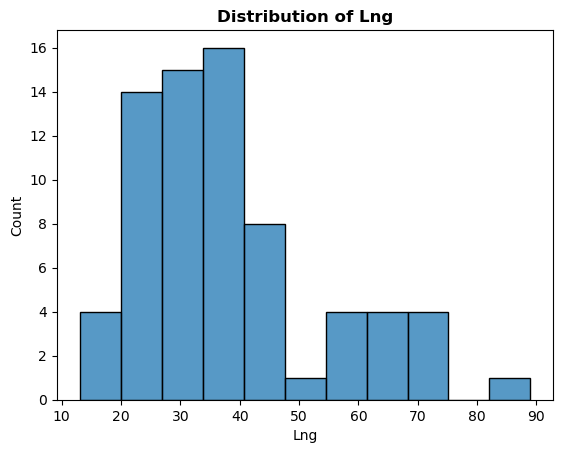

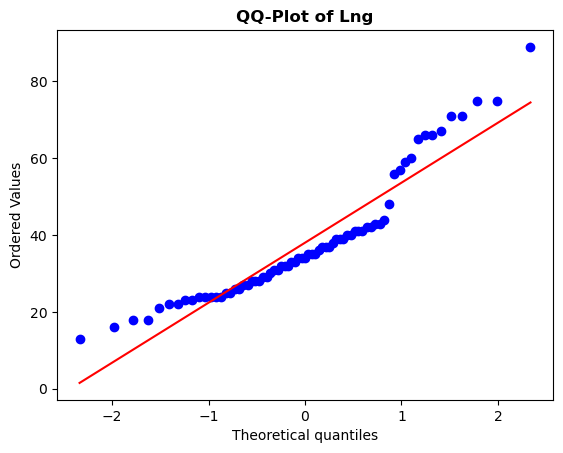

<Figure size 1200x600 with 0 Axes>

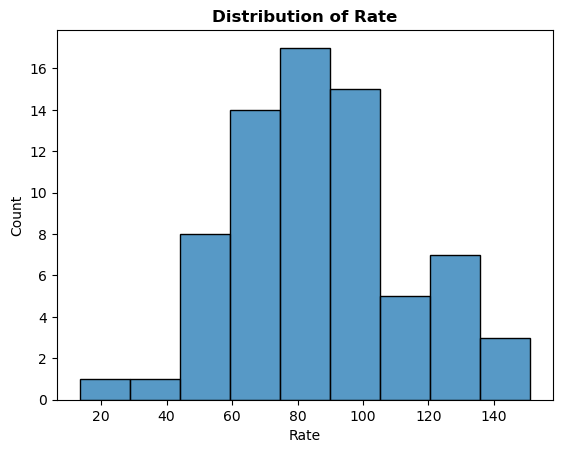

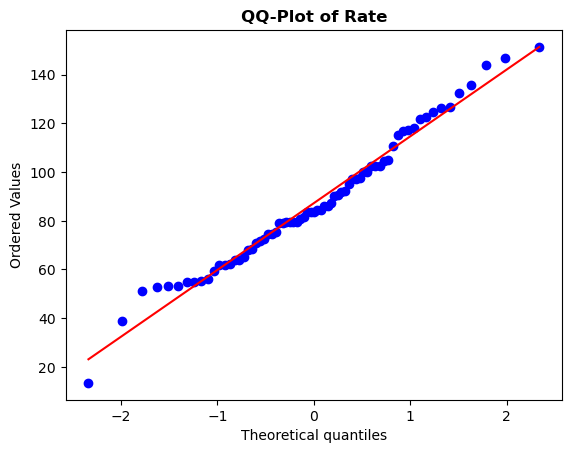

<Figure size 1200x600 with 0 Axes>

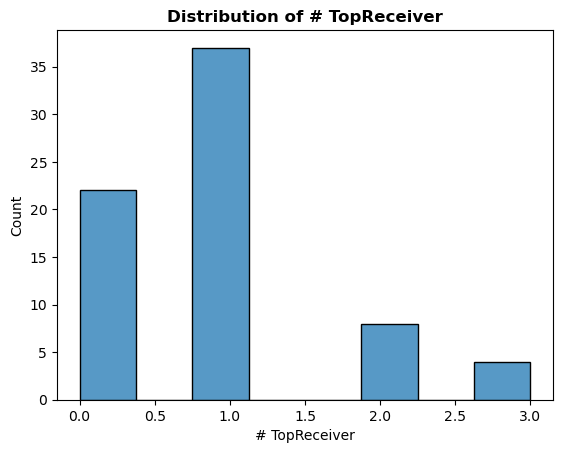

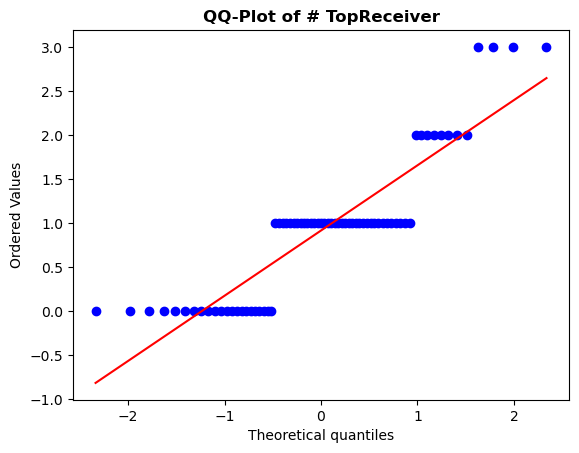

<Figure size 1200x600 with 0 Axes>

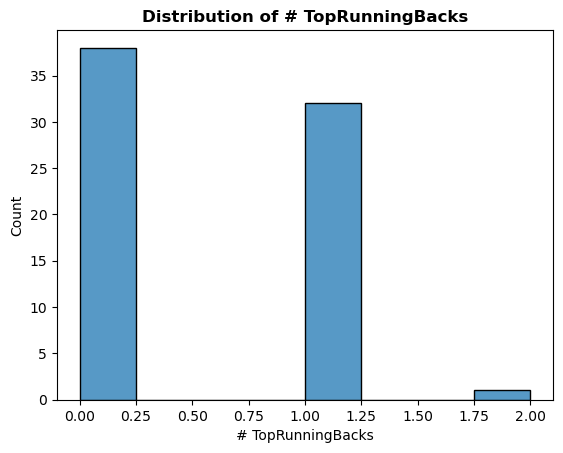

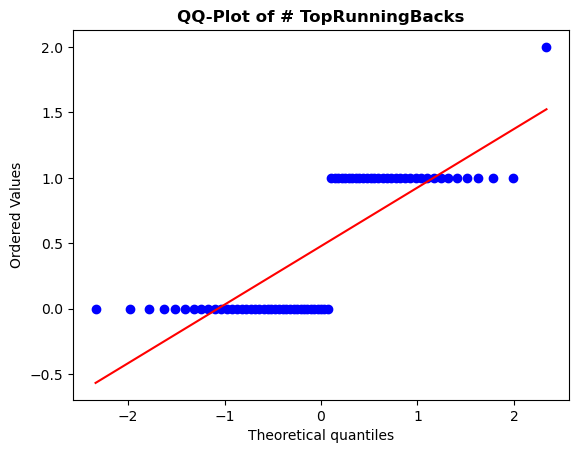

In [36]:
feats=['Cmp','Att','Cmp%','Avg_Yds','Yds','TD','Int','Sk','Def-Rating','Lng','Rate','# TopReceiver','# TopRunningBacks']

for feat in feats:
    plt.figure(figsize=(12,6))
    plt.subplots(1,1)
    sns.histplot(x=feat, data=df,bins='auto')
    plt.title('Distribution of {}'.format(feat),size=12,fontweight='bold')
    plt.subplots(1,1)
    stats.probplot(df[feat], dist="norm", plot=plt)
    plt.title('QQ-Plot of {}'.format(feat),size=12,fontweight='bold')

As we can see, not all features follow a normal distribution. We are planning to use models which need scaling, therefore we will split the X features into normal and non-normal distribution, and we will apply the StandardScaler for features with normal distribution and PowerTransformer for non-normal distributed features.

## Scaling the Data

In [42]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

normal=['Cmp','Att','Cmp%','Avg_Yds','Rate']
non_normal=['TD','Int','Sk','Def-Rating','Lng','# TopReceiver','# TopRunningBacks']

normal_scaler=StandardScaler()
non_normal_scaler=PowerTransformer()

#scaling normal data
normal_scaled_X_train=normal_scaler.fit_transform(X_train[normal])
normal_scaled_X_test=normal_scaler.transform(X_test[normal])

#scaling non-normal data
non_normal_scaled_X_train=non_normal_scaler.fit_transform(X_train[non_normal])
non_normal_scaled_X_test=non_normal_scaler.transform(X_test[non_normal])

#stacking the scaled X_train and X_test
scaled_X_train=np.hstack((normal_scaled_X_train,non_normal_scaled_X_train))
scaled_X_test=np.hstack((normal_scaled_X_test,non_normal_scaled_X_test))

#
scaled_X_train=pd.DataFrame(scaled_X_train,columns=normal + non_normal)
scaled_X_test=pd.DataFrame(scaled_X_test,columns=normal + non_normal)

# Model Selection
## Buidling the Dummy Model

Cross Validation Scores 
 [104.63211689207881, 80.83062925030337, 73.04466206541036, 67.07339729728918, 66.49992951124084, 63.94338060143759, 62.46357063320988, 55.75179369311807, 52.26386099821099, 51.575824036073335]


Best performance of the Dummy Regressor:  51.575824036073335


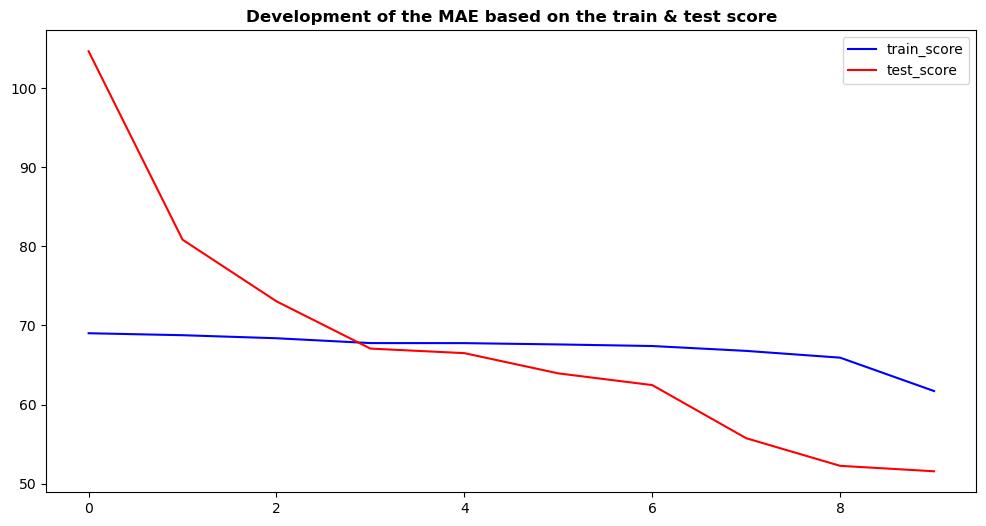

In [55]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv=KFold(n_splits=10, shuffle=True, random_state=101)

base_reg=DummyRegressor()

train_test= cross_validate(base_reg, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', return_train_score=True)
(train_test.keys())
sorted(['train_score', 'test_score'])

scorer=cross_val_score(base_reg, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', error_score='raise')

plt.figure(figsize=(12,6))
plt.plot(sorted(train_test['train_score']*-1, reverse=True), color='blue')
plt.plot(sorted(train_test['test_score']*-1, reverse=True), color='red')
plt.legend(['train_score','test_score'])
plt.title("Development of the MAE based on the train & test score", size=12, fontweight='bold')
dummy_reg_mae=scorer.max()*-1
print('Cross Validation Scores',"\n",sorted(scorer*-1, reverse=True))
print('\n')
print('Best performance of the Dummy Regressor: ', dummy_reg_mae)

When we look at the developmentof the train & test score we can see that the train score stays relativley the same and the test score is continously decreasing. This is an massive indicator that our model is underfitting, which means our model is not able, throughout training, to understand the unique characteristic of the features that are used in the model.

It is important to mention, that it is a dummy model, we did not perform any hyperparameter tuning and the model is not surphisticated enough to bring a very accurate outcome. The intention of the model is to provide baseline on which we can compare the different models with.

## Model Selection

In this project we will try different models:

- Lasso & Elastic Net (Because we have a lot of features and our feature selection has indicated that our features are not equally weighted)


- KNeighborsRegressor (Because of feature similarity, can be a good fit)


- SVM with just a "linear" kernel


- Decision Tree Regressor

## Hyperparameter tuning

Hyperparameter tuning allows us to find the best hyperparameter for each model based on the existing data.

In this project I will use **RandomizedSearchCV** for Hyperparameter tuning.

## Metric - Root Mean Squared Error

I have decided to use the root mean squared error, it penalize bigger errors, which is good, because we want to get the most accurate outcome possible.

## Cross Validation
For the cross validation we will use the KFold approach which is very common for regression problems.

# Model Training
## Lasso Regressor
### With scaled Data

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv=KFold(n_splits=10,shuffle=True,random_state=101)

lasso_reg=Lasso(random_state=101)

param={'alpha':np.linspace(0.0001,1.0,100),'fit_intercept':[True,False],'precompute':[True,False],
       'max_iter':[1000,10000,100000],'tol':np.linspace(0.0004,1,10),'selection':['cyclic','random']}

s_las_ram_reg=RandomizedSearchCV(lasso_reg, param,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

s_las_ram_reg.fit(scaled_X_train,y_train)

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.965e+03, tolerance: 1.017e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.823e+03, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+04, toleranc

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=Lasso(random_state=101),
                   n_iter=1000,
                   param_distributions={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-...
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 10000, 100000],
                                        'precompute': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'tol': array([4.00000000e-04, 1.11466667e-01, 2.22533333e-01, 3.33600000e-01,
       4.44666667e-01, 5.55733333e-01, 6.66800000e-01, 7.77866667e-01,
       8.88933333e-01, 1.00000000e+00])},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

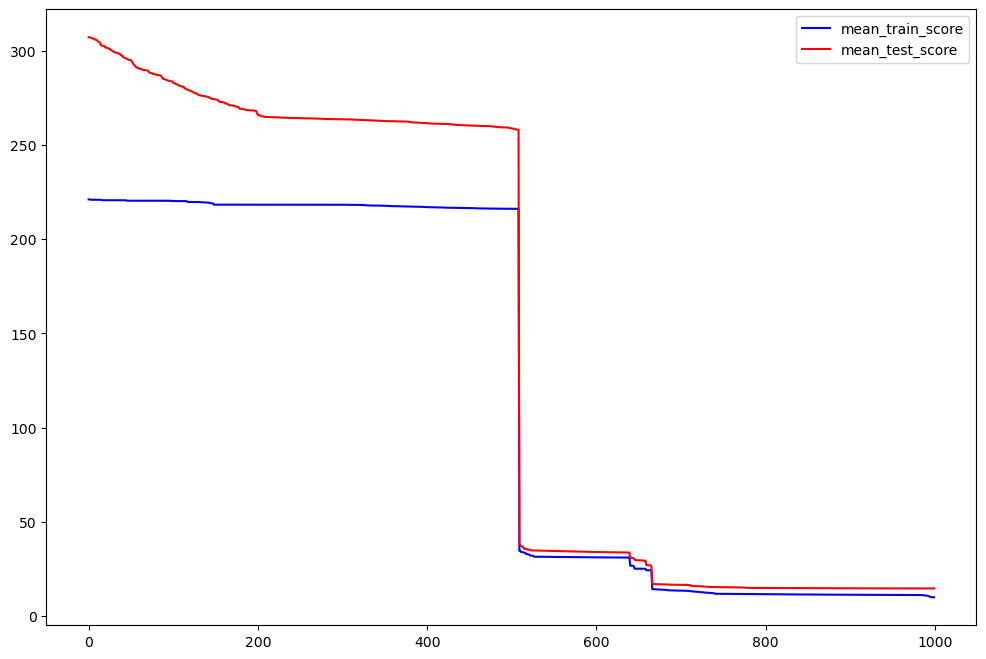

In [46]:
s_las_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(s_las_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(s_las_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [47]:
best_score_s_lasso=s_las_ram_reg.best_score_*-1
print("Best Lasso Score: ",best_score_s_lasso)
print('\n')
print("Best Params: ",s_las_ram_reg.best_params_)

Best Lasso Score:  14.656456865181223


Best Params:  {'tol': 0.33360000000000006, 'selection': 'cyclic', 'precompute': False, 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.18189999999999998}


### Lasso without scaled Data

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv=KFold(n_splits=10,shuffle=True,random_state=101)

lasso_reg=Lasso(random_state=101)

param={'alpha':np.linspace(0.0001,1.0,100),'fit_intercept':[True,False],'precompute':[True,False],
       'max_iter':[1000,10000,100000],'tol':np.linspace(0.0004,1,10),'selection':['cyclic','random']}

las_ram_reg=RandomizedSearchCV(lasso_reg, param,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

las_ram_reg.fit(X_train,y_train)

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+02, tolerance: 8.774e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327.4614114035185, tolerance: 1022.6628000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2062.2477076554624, tolerance: 983.518
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+03, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+03, tolerance: 9.835e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.107e+03, toleranc

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.383e+03, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.519e+03, tolerance: 9.835e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+03, toleranc

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3849.7970665124017, tolerance: 1022.6628000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4112.771707397824, tolerance: 983.518
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4014.3300592287396, tolerance: 908.4208000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: Convergen

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2605.2746436541115, tolerance: 1051.702
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2424.0039107587295, tolerance: 1044.5168
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088.424489950923, tolerance: 1016.9440000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarni

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2016.6853480501713, tolerance: 1051.702
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1577.3835430446725, tolerance: 1044.5168
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2486.2234444720084, tolerance: 1016.9440000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarn

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=Lasso(random_state=101),
                   n_iter=1000,
                   param_distributions={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-...
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 10000, 100000],
                                        'precompute': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'tol': array([4.00000000e-04, 1.11466667e-01, 2.22533333e-01, 3.33600000e-01,
       4.44666667e-01, 5.55733333e-01, 6.66800000e-01, 7.77866667e-01,
       8.88933333e-01, 1.00000000e+00])},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

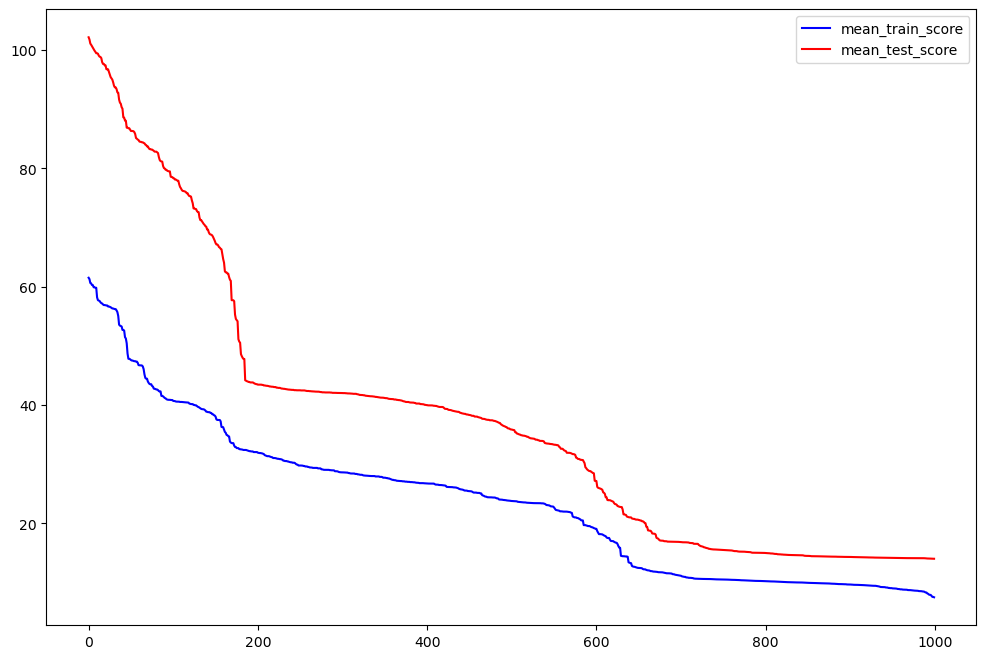

In [49]:
las_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(las_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(las_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [50]:
best_score_lasso=las_ram_reg.best_score_*-1
print("Best Lasso Score: ",best_score_lasso)
print('\n')
print("Best Params: ",las_ram_reg.best_params_)

Best Lasso Score:  14.038174935136771


Best Params:  {'tol': 0.11146666666666667, 'selection': 'cyclic', 'precompute': False, 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.5051}


The Lasso model is clearly underfitting, but performs better than our baseline model.

Next, we will perform an Elastic Net Model, because we have many features but these features are not equally weighted.

## Elastic Net
### With scaling

In [51]:
from sklearn.linear_model import ElasticNet

eln_reg=ElasticNet(random_state=101)

param={'alpha':np.linspace(0.0001,1.0,100),'l1_ratio':np.linspace(0,1,10),'fit_intercept':[True,False],'precompute':[True,False],
       'max_iter':[1000,10000,100000],'tol':np.linspace(0.0004,1,10),'selection':['cyclic','random']}

s_eln_ram_reg=RandomizedSearchCV(eln_reg, param,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

s_eln_ram_reg.fit(scaled_X_train,y_train)

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+06, tolerance: 1.023e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+06, tolerance: 1.037e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184575.605334301, tolerance: 853413.1848000002
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1178325.475286261, tolerance: 864583.7808000002
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning:

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+06, tolerance: 7.576e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+06, tolerance: 8.771e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1158556.4038857352, tolerance: 576734.7442666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: O

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+06, tolerance: 2.889e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+06, tolerance: 2.986e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1160028.723106688, tolerance: 1082843.3733333335
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordina

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+06, tolerance: 2.850e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+06, tolerance: 2.741e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39025.24789747561, tolerance: 24057.253015602837
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: O

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1161962.400358531, tolerance: 284982.0336
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objectiv

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+06, tolerance: 8.481e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+06, tolerance: 8.534e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+06, tolerance: 1.023e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+06, tolerance: 9.835e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+06, tolerance: 5.693e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+06, tolerance: 5.767e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173139.8731474369, tolerance: 1130502.7466666668
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193158.2420297351, tolerance: 1137543.154
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Co

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1136955.3094186855, tolerance: 974.072
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+04, tolerance: 8.633e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+06, tolerance: 1.137e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+06, tolerance: 1.093e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+04, tolerance: 8.977e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.459e+04, tolerance: 8.818e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+06, tolerance: 1.023e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+06, tolerance: 9.835e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.810e+04, tolerance: 2.406e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+04, tolerance: 2.495e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=ElasticNet(random_state=101),
                   n_iter=1000,
                   param_distributions={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1....
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [1000, 10000, 100000],
                                        'precompute': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'tol': array([4.00000000e-04, 1.11466667e-01, 2.22533333e-01, 3.33600000e-01,
       4.44666667e-01, 5.55733333e-01, 6.66800000e-01, 7.77866667e-01,
       8.88933333e-01, 1.00000000e+00])},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

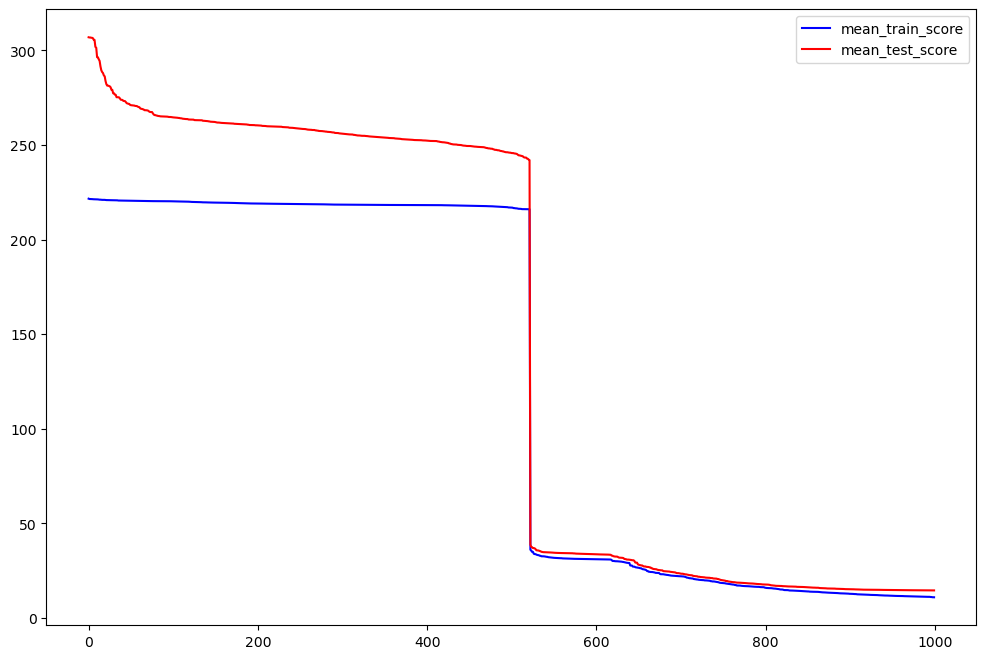

In [52]:
s_eln_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(s_eln_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(s_eln_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [53]:
best_score_s_Elastic_Net=s_eln_ram_reg.best_score_*-1
print("Best Lasso Score: ",best_score_s_Elastic_Net)
print('\n')
print("Best Params: ",s_eln_ram_reg.best_params_)

Best Lasso Score:  14.558390631503963


Best Params:  {'tol': 0.11146666666666667, 'selection': 'cyclic', 'precompute': False, 'max_iter': 10000, 'l1_ratio': 0.3333333333333333, 'fit_intercept': True, 'alpha': 0.0708}


### Elastic Net without scaling

In [54]:
from sklearn.linear_model import ElasticNet

eln_reg=ElasticNet(random_state=101)

param={'alpha':np.linspace(0.0001,1.0,100),'l1_ratio':np.linspace(0,1,10),'fit_intercept':[True,False],'precompute':[True,False],
       'max_iter':[1000,10000,100000],'tol':np.linspace(0.0004,1,10),'selection':['cyclic','random']}

eln_ram_reg=RandomizedSearchCV(eln_reg, param,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

eln_ram_reg.fit(X_train,y_train)

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+03, tolerance: 9.084e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.715e+03, tolerance: 1.037e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\U

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.399e+03, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.396e+03, tolerance: 9.835e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.105e+03, toleranc

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+04, tolerance: 1.023e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+04, tolerance: 9.835e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1424.7329370831958, tolerance: 1022.6628000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2310.1692303825985, tolerance: 1051.702
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1727.3747828839523, tolerance: 1044.5168
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarn

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5312.757874342216, tolerance: 974.072
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.805e+03, tolerance: 8.633e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.873e+03, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.079e+03, tolerance: 9.835e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.938e+03, toleranc

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5810.498751444506, tolerance: 1022.6628000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5715.082481808815, tolerance: 983.518
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4756.659909022799, tolerance: 908.4208000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: Convergence

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective di

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5857.467648960417, tolerance: 1022.6628000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5804.894312740056, tolerance: 983.518
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.892887123386, tolerance: 908.4208000000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: Convergence

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.684e+03, tolerance: 8.977e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.819e+03, tolerance: 8.818e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.211e+03, tolerance: 1.023e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+03, tolerance: 9.835e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.872e+03, tolerance: 1.023e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+03, tolerance: 9.835e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.632e+03, toleranc

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=ElasticNet(random_state=101),
                   n_iter=1000,
                   param_distributions={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1....
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [1000, 10000, 100000],
                                        'precompute': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'tol': array([4.00000000e-04, 1.11466667e-01, 2.22533333e-01, 3.33600000e-01,
       4.44666667e-01, 5.55733333e-01, 6.66800000e-01, 7.77866667e-01,
       8.88933333e-01, 1.00000000e+00])},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

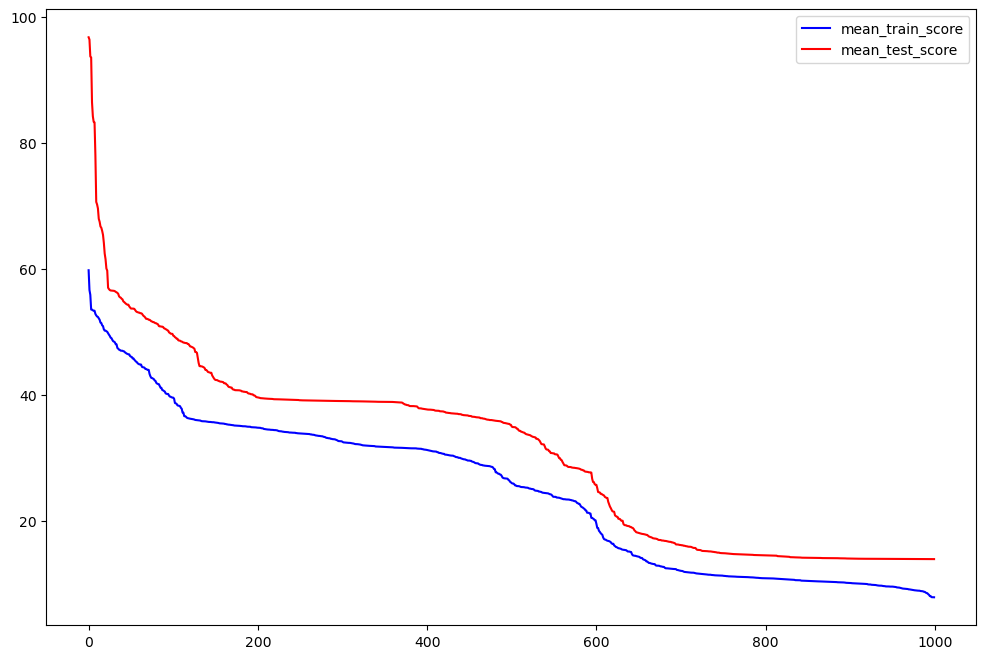

In [55]:
eln_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(eln_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(eln_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [56]:
best_score_Elastic_Net=eln_ram_reg.best_score_*-1
print("Best Elastic Net Score: ",best_score_Elastic_Net)
print('\n')
print("Best Params: ",eln_ram_reg.best_params_)

Best Elastic Net Score:  13.978923077339397


Best Params:  {'tol': 0.8889333333333334, 'selection': 'cyclic', 'precompute': True, 'max_iter': 1000, 'l1_ratio': 0.4444444444444444, 'fit_intercept': True, 'alpha': 0.7676999999999999}


The elastic model is underfitting as well, but is slightly perfroming worse then the lasso regression. Next, we will try the KNeigbours model.

## KNeighborsRegressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg=KNeighborsRegressor()

param_knn={'n_neighbors':range(1,48), 'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
           'leaf_size':range(1,250), 'metric':['minkowski','euclidean','manhattan','cityblock','chebyshev']}

s_knn_ram_reg=RandomizedSearchCV(knn_reg, param_knn,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

s_knn_ram_reg.fit(scaled_X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=KNeighborsRegressor(),
                   n_iter=1000,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(1, 250),
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'cityblock',
                                                   'chebyshev'],
                                        'n_neighbors': range(1, 48),
                                        'weights': ['uniform', 'distance']},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

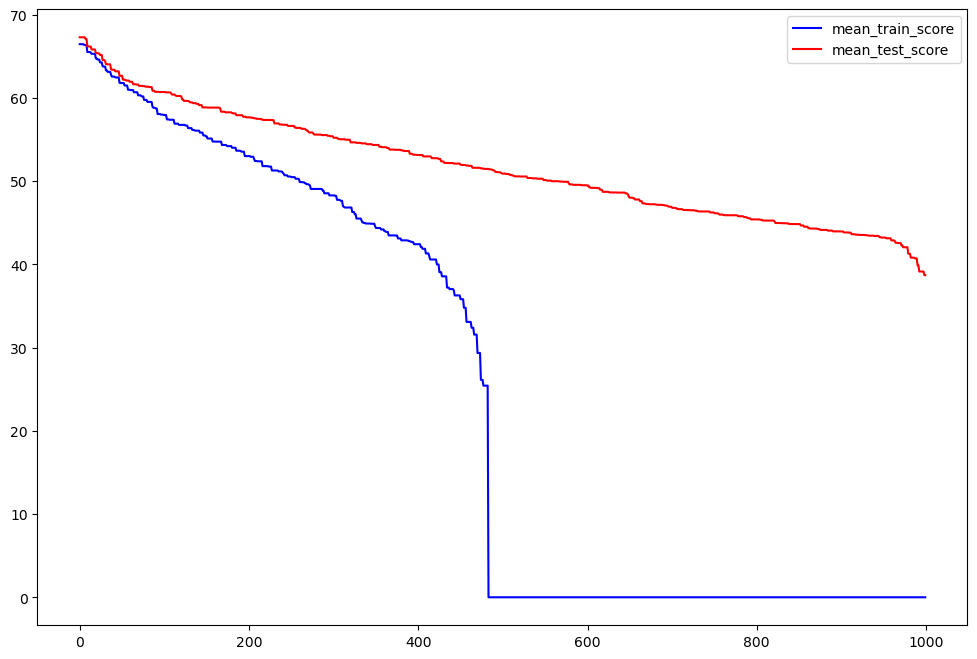

In [58]:
s_knn_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(s_knn_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(s_knn_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [59]:
best_score_KNeighborsRegressor=s_knn_ram_reg.best_score_*-1
print("Best KNeighborsRegressor Score: ",best_score_KNeighborsRegressor)
print('\n')
print("Best Params: ",s_knn_ram_reg.best_params_)

Best KNeighborsRegressor Score:  38.71169950238383


Best Params:  {'weights': 'distance', 'n_neighbors': 4, 'metric': 'minkowski', 'leaf_size': 225, 'algorithm': 'auto'}


The KNeighborsRegressor model is clearly overfitting, as we can see in the graph above. The training score is decreasing drastically but the test score decreases slower.

Next, we will try a linear SVM and see how it will perform.

## Linear SVM

In [60]:
from sklearn.svm import LinearSVR

lsvr_reg=LinearSVR(random_state=101)

param_lsvr={'epsilon':np.linspace(0,1,10), 'tol':[0.0001,0.001,0.01,0.1],'C':[0.1,1,10,100,1000],
           'intercept_scaling':np.linspace(0.1,1.0,10), 'loss':['epsilon_insensitive','squared_epsilon_insensitive']
           ,'max_iter':[1000,10000,100000]}

lsvr_ram_reg=RandomizedSearchCV(lsvr_reg, param_lsvr,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

lsvr_ram_reg.fit(scaled_X_train,y_train)

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=LinearSVR(random_state=101),
                   n_iter=1000,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'epsilon': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'intercept_scaling': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'loss': ['epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [1000, 10000, 100000],
                                        'tol': [0.0001, 0.001, 0.01, 0.1]},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

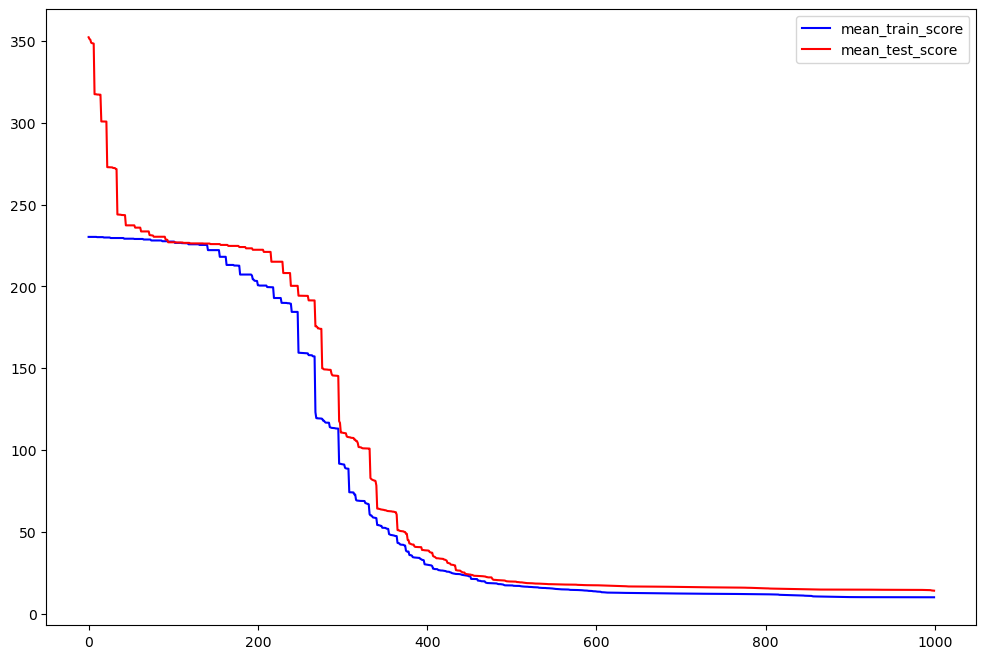

In [61]:
lsvr_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(lsvr_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(lsvr_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [62]:
best_score_lsvr=lsvr_ram_reg.best_score_*-1
print("Best Linear SVM Score: ",best_score_lsvr)
print('\n')
print("Best Params: ",lsvr_ram_reg.best_params_)

Best Linear SVM Score:  13.987092520537086


Best Params:  {'tol': 0.1, 'max_iter': 10000, 'loss': 'squared_epsilon_insensitive', 'intercept_scaling': 1.0, 'epsilon': 0.1111111111111111, 'C': 1}


That is the first model with the best fit, but it has not the best score. Let's finsh up with the last model, which is a decision tree model.

## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=101)

param_tree={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random'],
           'max_depth':range(1,100),'min_samples_split':np.linspace(2,50,2).astype(int),'min_samples_leaf':np.linspace(2,50,2).astype(int),
           'max_features':np.linspace(1,50,2).astype(int), 'max_leaf_nodes':np.linspace(2,50,2).astype(int),
            'min_impurity_decrease':np.linspace(0.0,1.0,10), 'ccp_alpha':np.linspace(0.0,1.0,10)}

tree_ram_reg=RandomizedSearchCV(tree_reg, param_tree,n_iter=1000,cv=cv,scoring='neg_root_mean_squared_error',
                              refit=True,random_state=101,error_score='raise',return_train_score=True)

tree_ram_reg.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise',
                   estimator=DecisionTreeRegressor(random_state=101),
                   n_iter=1000,
                   param_distributions={'ccp_alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',...
                                        'max_features': array([ 1, 50]),
                                        'max_leaf_nodes': array([ 2, 50]),
                                        'min_impurity_decrease': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'min_samples_leaf': array([ 2, 50]),
                                        'min_samples_split': array([ 2, 50]),
                                        'splitter': ['best', 'random']},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

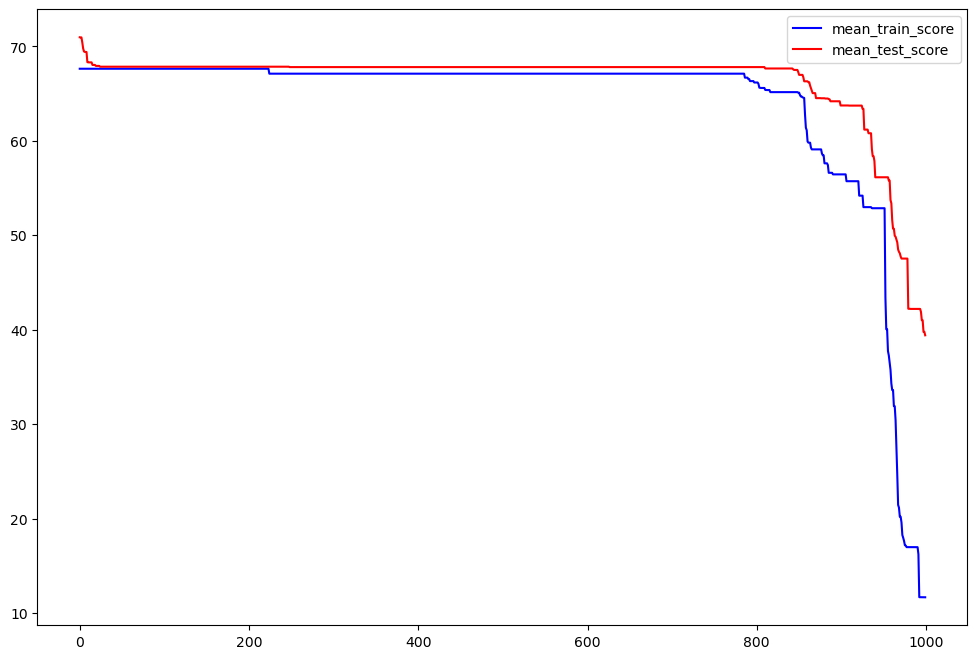

In [64]:
tree_ram_reg.cv_results_.keys()
plt.figure(figsize=(12,8))
plt.plot(sorted(tree_ram_reg.cv_results_['mean_train_score']*-1,reverse=True), color='blue')
plt.plot(sorted(tree_ram_reg.cv_results_['mean_test_score']*-1,reverse=True), color='red')
plt.legend(['mean_train_score','mean_test_score'])

In [65]:
best_score_tree=tree_ram_reg.best_score_*-1
print("Best Decision Tree Regression Score: ",best_score_tree)
print('\n')
print("Best Params: ",tree_ram_reg.best_params_)

Best Decision Tree Regression Score:  39.407122935798654


Best Params:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.8888888888888888, 'max_leaf_nodes': 50, 'max_features': 50, 'max_depth': 91, 'criterion': 'absolute_error', 'ccp_alpha': 0.7777777777777777}


The outcome of the model is that we do not get a better score than the lasso regression and the model is overfitting, which we can see by the drastic drop of the training score.

In [66]:
data={'Scaled Lasso':best_score_s_lasso,'Lasso':best_score_lasso,'Scaled Elastic Net':best_score_s_Elastic_Net,
      'Elastic Net':best_score_Elastic_Net,'KNN Reg':best_score_KNeighborsRegressor,
      'Linear SVM':best_score_lsvr,'Decision Tree':best_score_tree}

output=pd.DataFrame.from_dict(data,orient='index').rename(columns={0:'best RMSE'})
output

,best RMSE
Scaled Lasso,14.656457
Lasso,14.038175
Scaled Elastic Net,14.558391
Elastic Net,13.978923
KNN Reg,38.711700
Linear SVM,13.987093
Decision Tree,39.407123


In [67]:
output[output['best RMSE']==output['best RMSE'].min()]

,best RMSE
Elastic Net,13.978923


The models which requiered scaling tend to overfit. As we know there are a couple methods to deal with underfitting, one of them is to reduce the regulazation, which we did for the underfitting models. We passed the X features with and without scaling in our models, which allowed us to get fitting models. The final model will be the Elastic Net model without scaling.

# Evaluation of the Final Model

In [68]:
from sklearn.metrics import mean_absolute_error

final_pred=eln_ram_reg.predict(X_test)

print("MAE output of the final model: ",mean_absolute_error(y_test, final_pred))

MAE output of the final model:  16.102942889801234


On average the model is 16.102942889801234 yards off from the orginal data (prediction vs original). Is that good? It dependes, lets check real quick what the avg passing yards performance is. 

In [74]:
mae = mean_absolute_error(y_test, final_pred)
average_yards = df['Yds'].mean()
percentage_mae = (mae / average_yards) * 100

print("Value what the model is off on average: ", round(percentage_mae, 2), "%")

Value what the model is off on average:  7.07 %


This means, the model's predictions are off by 7.07% on average.

In [83]:
X.columns

Index(['Cmp', 'Att', 'Cmp%', 'Avg_Yds', 'TD', 'Int', 'Sk', 'Def-Rating', 'Lng',
       'Rate', 'Home Game', '# TopReceiver', '# TopRunningBacks',
       'Opponent_ATL', 'Opponent_BAL', 'Opponent_BUF', 'Opponent_CAR',
       'Opponent_CHI', 'Opponent_CIN', 'Opponent_CLE', 'Opponent_DAL',
       'Opponent_DEN', 'Opponent_DET', 'Opponent_GNB', 'Opponent_HOU',
       'Opponent_IND', 'Opponent_JAX', 'Opponent_KAN', 'Opponent_LAC',
       'Opponent_LAR', 'Opponent_LVR', 'Opponent_MIA', 'Opponent_MIN',
       'Opponent_NOR', 'Opponent_NWE', 'Opponent_NYG', 'Opponent_NYJ',
       'Opponent_OAK', 'Opponent_PHI', 'Opponent_PIT', 'Opponent_SEA',
       'Opponent_SFO', 'Opponent_TAM', 'Opponent_TEN', 'Opponent_WAS'],
      dtype='object')

In [84]:
# setting up the final model
final_model=eln_ram_reg

In [85]:
import joblib
joblib.dump(final_model,"Baker's_Passing_Performance_2023.pkl")

["Baker's_Passing_Performance_2023.pkl"]

In [86]:
joblib.dump(list(X.columns),"col_names.pkl")

['col_names.pkl']

The analyis ends here, next I will open a new notebook where we will predict Baker's passing output for the 2023 season.